## Introduction

We are tasked with assisting a candidate’s political campaign by using regression modeling and statistical inference to understand the factors affecting crimes rate in a county, that can help in formulating an effective political policy. The main dependent variable modeled in this paper is crime rate which is a part of the data set containing crime statistics from 1980s on a selection of North Carolina counties. Linear regression modeling using OLS method was used to examine and model crime rate and hypothesis testing was conducted to understand the statistical significance of model coefficients. This is followed by a discussion of practical significance of the coefficients on the given data. The objective of this analysis is to propose a linear model that can explain the dependence of crimes committed per capita in a county on various socio-economic factors and help the campaign with formulation of political policy. The dataset is described in the following table.


In [1]:
install.packages("animation")
install.packages("magick")

also installing the dependency ‘magick’

Warning message in install.packages("animation"):
“installation of package ‘magick’ had non-zero exit status”Warning message in install.packages("animation"):
“installation of package ‘animation’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Warning message in install.packages("magick"):
“installation of package ‘magick’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
# library(magick)
ggdraw() +
  draw_image("lab3_col_desc.png") 
# include_graphics('lab3_col_desc.png')

ERROR: Error in ggdraw(): could not find function "ggdraw"


In [170]:
# To install libraries used in this lab, use following code
# install.packages("car",repos = "http://cran.us.r-project.org")
# install.packages("ggplot2",repos = "http://cran.us.r-project.org")
# install.packages("stargazer",repos = "http://cran.us.r-project.org")
# install.packages("lmtest",repos = "http://cran.us.r-project.org")
# install.packages("sandwich",repos = "http://cran.us.r-project.org")
# install.packages("effsize")
# install.packages('corrplot')
# install.packages("ggplot2")
# install.packages("gridExtra")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library(stargazer)
library(car)
library(effsize)
library(sandwich)
library(lmtest)
library(ggplot2)
library(corrplot)
library(gridExtra)


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Loading required package: carData
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

corrplot 0.84 loaded


### Initial Data Loading and Data Cleansing (EDA)
We begin by loading in our data, saved in a file called crime_v2.csv. Libraries that will be used for various R functions in this report are initialized here.

In [4]:
#Importing Data
crime_df = read.csv("crime_v2.csv")
head(crime_df)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,⋯,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,⋯,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,⋯,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,⋯,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,⋯,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,⋯,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


Lets take a quick look at the characteristics of the data set.

In [5]:
summary(crime_df, width = 60)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

In [6]:
#Initial Data View
cat('Note that the final 6 rows of imported data are NA.')
head(crime_df,1)
tail(crime_df,7)

Note that the final 6 rows of imported data are NA.

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.29827,0.527595997,0.43617,6.71,0.00182786,2.422633,30.99368,⋯,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097


,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
91,197,87,0.0141928,0.207595,1.182929993,0.360825,12.23,0.00118573,0.889881,25.95258,⋯,341.8803,182.802,348.1432,212.8205,322.92,391.72,385.65,306.85,0.06756757,0.07419893
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


We clean up the dataset to convert the extra '~' to NA and remove the empty (NA) rows and demonstrate the fix.

In [7]:
#Cleaning data to remove final",,,`,,"
crime_df <- read.csv("crime_v2.csv", na.strings ="`") #convert tilde to NA for solve in next step.
crime_df <- na.omit(crime_df) #Drop NAs

#Demonstrating fix
head(crime_df,2)
tail(crime_df,2)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527596,0.43617,6.71,0.00182786,2.422633,30.99368,⋯,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480,0.45000,6.35,0.00074588,1.046332,26.89208,⋯,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694


,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
90,195,87,0.0313973,0.201397,1.67052,0.470588,13.02,0.00445923,1.745989,53.66693,⋯,377.9356,246.0614,411.4330,296.8684,392.27,480.79,303.11,337.28,0.15612382,0.07945071
91,197,87,0.0141928,0.207595,1.18293,0.360825,12.23,0.00118573,0.889881,25.95258,⋯,341.8803,182.8020,348.1432,212.8205,322.92,391.72,385.65,306.85,0.06756757,0.07419893


In [8]:
str(crime_df, width = 60)

'data.frame':	91 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : num  0.528 1.481 0.268 0.525 0.477 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  335 300 238 282 291 ...
 $ wfed    : num 

We can see that there are 91 observations of 25 variables post the Nulls clean up. <br>
Let us check if there are any duplicate records:

In [9]:
crime_df[duplicated(crime_df),]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
89,193,87,0.0235277,0.266055,0.588859,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394


Converting the non-numeric field to numeric

In [10]:
## converting the non-numeric field to numeric
crime_df$prbconv <- as.numeric(crime_df$prbconv)

Let us remove the duplicate/s and re-check the data.

In [11]:
crime_df = crime_df[!duplicated(crime_df),]
str(crime_df, width = 60)

'data.frame':	90 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : num  0.528 1.481 0.268 0.525 0.477 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  335 300 238 282 291 ...
 $ wfed    : num 

We can see that there are 90 observations of 25 variables post the Nulls clean up and removal of duplicate row.

In [12]:
stargazer(crime_df, type = 'text', title = "Overview of variables in crime data set",
          header = FALSE)


Overview of variables in crime data set
Statistic N   Mean   St. Dev.   Min   Pctl(25) Pctl(75)    Max   
-----------------------------------------------------------------
county    90 100.600  58.315     1      51.5    150.5      197   
year      90 87.000   0.000     87       87       87       87    
crmrte    90  0.034   0.019    0.006   0.021    0.040     0.099  
prbarr    90  0.295   0.138    0.093   0.205    0.345     1.091  
prbconv   90  0.551   0.354    0.068   0.344    0.585     2.121  
prbpris   90  0.411   0.081    0.150   0.364    0.458     0.600  
avgsen    90  9.689   2.834    5.380   7.375    11.465   20.700  
polpc     90  0.002   0.001    0.001   0.001    0.002     0.009  
density   90  1.436   1.522   0.00002  0.547    1.569     8.828  
taxpc     90 38.161   13.112  25.693   30.735   41.010   119.761 
west      90  0.244   0.432      0       0        0         1    
central   90  0.378   0.488      0       0        1         1    
urban     90  0.089   0.286      0 

We see from the dataframe, that the data set contains 90 observations of 25 variables each. Most of the variables have numeric data type while there are a few categorical variables as well. The variable prbconv that represents probability of conviction is of factor data type. We believe that this is a coding error since the variable is defined as the ratio of convictions to arrests and looking at the data for other variables representing certainty of punishment (prbarr, prbpris), there appears no reason for prbconv to have non-continuous values. We have thus convert this variable type to numeric and enable its use as a continuous random variable in regression modeling.

For the variable prbarr, ‘probability’ of arrest, we see that there is one data point which has probability value greater than one which would not be possible if it was true probability. However, since a person can be convicted of multiple crimes but only arrested once, it can be possible to have a probability value greater than one where arrests are more than offenses reported. 

Similarly, the prbconv variable, ‘probability’ of conviction, has ten data points where the probability value is greater than one which would not be possible if it was a true probability measure. Again, we determine that since the prbconv is a proxy variable for the number of convictions to arrests, it can be possible to have a probability value greater than one where convictions are more than arrests reported.

We also noticed that the summary statistics reveal a potential outlier for the wser field which captures weekly average service sector wages. One county has a reported service sector wage greater than $2,177 which is almost ten times greater than the mean wage and substantially larger than the wages of other sectors as well. A histogram confirms that this is a significant outlier. It is possible that this observation stems for a single or few jobs in a county that are classified as service sector jobs, but are unrepresentive of the general service sector job in North Carolina. It is also possible that this is an error in the data. However we will choose to keep this as is rather than calling it an outlier and replacing with the median value as it is possible that some people might actually be making this salary due to some special circumstances like servers getting unbelivable tips.<br>

This datapoint would have a high leverage since the value of that point (wage greater than $2,177) is far away from the mean of wser. It also has high influence since removing it from the estimation will significantly change the results. We will note this through scatterplot during our analysis going forward.

For all the variables identified above we will show the log values if any of these are used in EDA along with their regular histograms.

#### We will first plot the crime rate

In [13]:
# Different plots of crmrte
crime1 <- (
ggplot(crime_df, aes(x=crmrte)) + geom_histogram(bins=50, color="black", fill="steelblue4") + xlab("Crime rate") + scale_x_continuous(limits=c(0, 0.1)) + ylab("Frequency") +
ggtitle("Distribution of Crime rate")
)

In [14]:
log_crmrte = log(crime_df$crmrte)
log_crime <- (
ggplot(crime_df, aes(x=log_crmrte)) + geom_histogram(bins=50, color="black", fill="steelblue4") + xlab("Crime rate") + scale_x_continuous(limits=c(-5.5, -2.5)) + ylab("Frequency") +
ggtitle("Log Distribution of Crime rate")
)

Warning message:
“Removed 3 rows containing non-finite values (stat_bin).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”

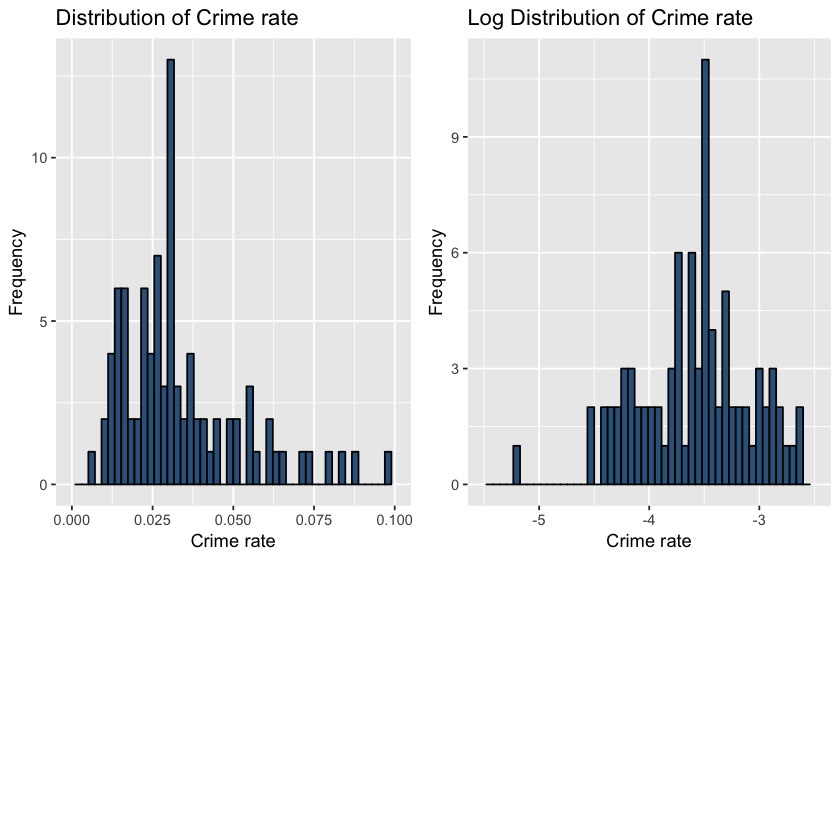

In [15]:
# multiplot(crime1, log_crime, crime2, crime3, cols=2)
grid.arrange(crime1, log_crime, ncol=2, heights=c(2,1))

This shows that crime rate has positive skew and log transformation would be appropriate. The histogram of the log-transformed variable shows an approximate normal distribution. Also log transformation in the model would give us way to analyze the percentage increase or decrease in crime rate based on different predictors rather than value change of crime rate, which will be useful to explain policy formation.

#### Next we will look at variables we believe can influence the crime rate like: prbarr (probability of arrest), prbconv (probability of conviction), polpc (police per capita), density (people per sq. mile), taxpc (tax revenue per capita), pctymle (percent young male) and average wages (new variable obtained by averaging out all the wage columns).
Our reasons for picking these variables are:
- prbarr (probability of arrest) : If this probability has a high value it will imply the crime rate will be lower since if there are more chances of being arrested if there is a crime committed less criminals would be tempted to commit crimes. Hence this would be inversely proportinal to crime rate.
- prbconv (probability of conviction) : If this probability has a high value it will imply the crime rate will be lower for reasons similar to the probability of arrest. Hence this would be inversely proportinal to crime rate.
- polpc (police per capita) : If this variable has a high value it will imply the crime rate will be lower for reasons similar to the probability of arrest and conviction. Hence this would be inversely proportinal to crime rate.
- density (people per sq. mile) : This should have a positive skew with the crime rate as there could be a tendency of crime rate to increase with increasing population.
- taxpc (tax revenue per capita) : taxpercent means more revenue for police, more funds for public service. Hence this would be inversely proportional to the crime rate.
- pctymle (percent young male) : This should have a positive skew with the crime rate as there could be a tendency of crime rate to increase with increasing young male population.
- average wages (new variable obtained by averaging out all the wage columns) : This should have a negative skew with the crime rate since increasing wages should indicate reduced crime rate.

Creating the new variable for average wage:

In [16]:
crime_df$wavg <- cbind(crime_df$wcon + crime_df$wtuc + crime_df$wtrd + crime_df$wfir + crime_df$wser + crime_df$wmfg + crime_df$wfed + crime_df$wsta + crime_df$wloc)/9
summary(crime_df$wavg)
head(crime_df[c('wcon', 'wtuc', 'wtrd', 'wfir', 'wser', 'wmfg', 'wfed', 'wsta', 'wloc', 'wavg')])

       V1       
 Min.   :259.8  
 1st Qu.:302.3  
 Median :322.9  
 Mean   :328.1  
 3rd Qu.:345.2  
 Max.   :496.0  

wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,wavg
281.4259,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,339.4322
255.1020,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,294.7643
226.9470,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,283.7386
375.2345,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,313.6815
292.3077,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,306.5820
250.4006,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,287.3655


In [17]:
## Simplifying all variable names
crmrte <- crime_df$crmrte
prbarr <- crime_df$prbarr
prbconv <- crime_df$prbconv
prbpris <- crime_df$prbpris
avgsen <- crime_df$avgsen
polpc <- crime_df$polpc
density <- crime_df$density
taxpc <- crime_df$taxpc
west <- crime_df$west
central <- crime_df$central
urban <- crime_df$urban
pctmin80 <- crime_df$pctmin80
wcon <- crime_df$wcon
wtuc <- crime_df$wtuc
wtrd <- crime_df$wtrd
wfir <- crime_df$wfir
wser <- crime_df$wser
wmfg <- crime_df$wmfg
wfed <- crime_df$wfed
wsta <- crime_df$wsta
wloc <- crime_df$wloc
mix <- crime_df$mix
pctymle <- crime_df$pctymle

We have noted during our earlier analysis that both prbarr and prbconv have outliers. Hence we will be checking the log transformed values for both these variables.

In [18]:
prbarr1 <- (
ggplot(crime_df, aes(x=prbarr)) + geom_histogram(bins=50, color="black", fill="steelblue4") + xlab("probability of arrest") + scale_x_continuous(limits=c(0, 1.2)) + ylab("Frequency") +
ggtitle("Distribution of probability of arrest")
)

In [56]:

prbarr2 <- (
ggplot(crime_df, aes(y=prbarr)) + 
  geom_boxplot(outlier.colour="steelblue4", outlier.shape=8,
                outlier.size=1.5)  + ggtitle("Distribution of probability of arrest")
)

In [57]:
prbconv1 <- (
ggplot(crime_df, aes(x=prbconv)) + geom_histogram(bins=50, color="black", fill="steelblue4") + xlab("probability of conviction") + scale_x_continuous(limits=c(0, 2.2)) + ylab("Frequency") +
ggtitle("Distribution of probability of conviction")
)

In [58]:

prbconv2 <- (
ggplot(crime_df, aes(y=prbconv)) + 
  geom_boxplot(outlier.colour="steelblue4", outlier.shape=8,
                outlier.size=1.5) + ggtitle("Distribution of probability of conviction")
)

Warning message:
“Removed 2 rows containing missing values (geom_bar).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

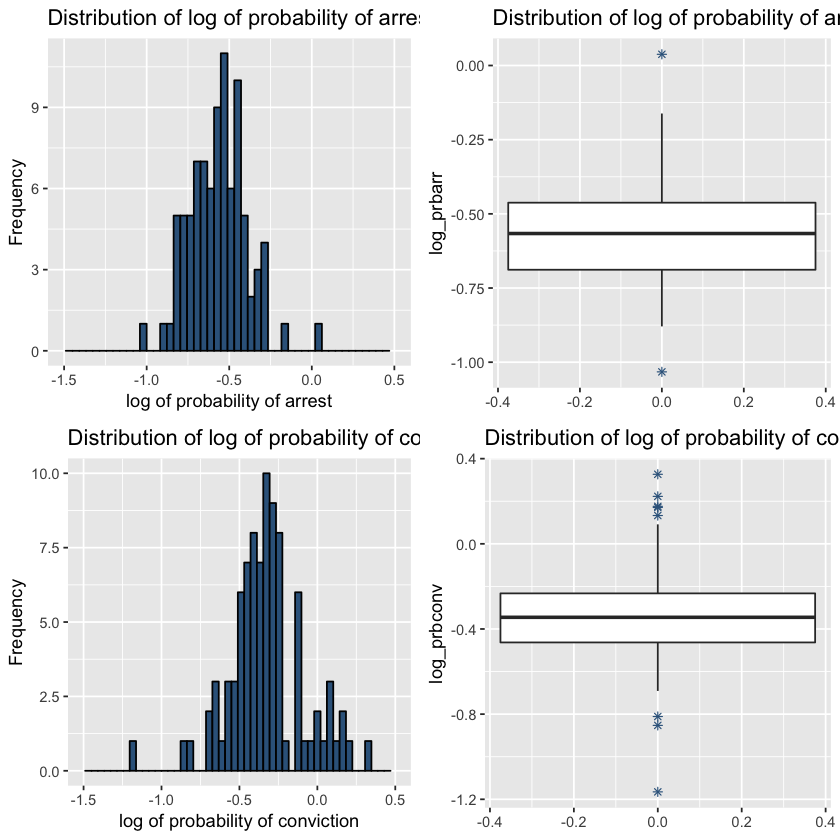

In [119]:
options(repr.plot.width=NULL, repr.plot.height=NULL)
grid.arrange(prbarr1, prbarr2, prbconv1, prbconv2, ncol=2, heights=c(2,2))

Histograms and boxplots for probability of arrest and conviction clearly show the outliers.

In [31]:
log_prbarr = log10(crime_df$prbarr)
prbarr1 <- (
ggplot(crime_df, aes(x=log_prbarr)) + geom_histogram(bins=50, color="black", fill="steelblue4") + xlab("log of probability of arrest") + scale_x_continuous(limits=c(-1.5, 0.5)) + ylab("Frequency") +
ggtitle("Distribution of log of probability of arrest")
)

In [62]:

prbarr2 <- (
ggplot(crime_df, aes(y=log_prbarr)) +
  geom_boxplot(outlier.colour="steelblue4", outlier.shape=8,
                outlier.size=1.5) + ggtitle("Distribution of log of probability of arrest")
)

In [63]:

log_prbconv = log10(crime_df$prbconv)
prbconv1 <- (
ggplot(crime_df, aes(x=log_prbconv)) + geom_histogram(bins=50, color="black", fill="steelblue4") + xlab("log of probability of conviction") + scale_x_continuous(limits=c(-1.5, 0.5)) + ylab("Frequency") +
ggtitle("Distribution of log of probability of conviction")
)

In [64]:

prbconv2 <- (
ggplot(crime_df, aes(y=log_prbconv)) + 
  geom_boxplot(outlier.colour="steelblue4", outlier.shape=8,
                outlier.size=1.5) + ggtitle("Distribution of log of probability of conviction")
)

Warning message:
“Removed 2 rows containing missing values (geom_bar).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

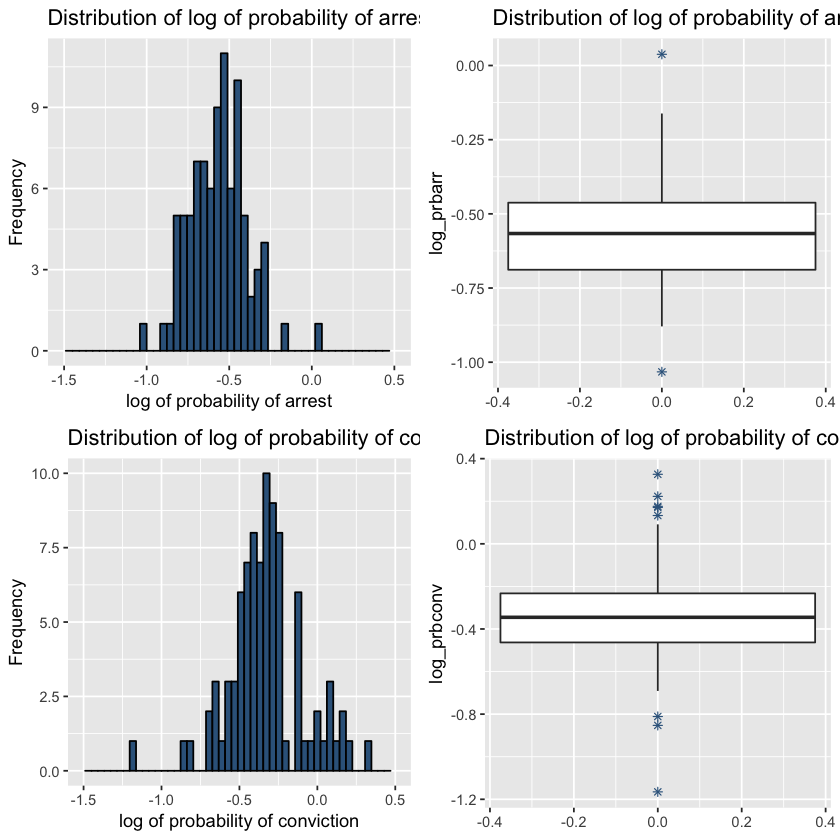

In [65]:
options(repr.plot.width=NULL, repr.plot.height=NULL)
grid.arrange(prbarr1, prbarr2, prbconv1, prbconv2, ncol=2, heights=c(2,2))

The histogram and box plots of the log-transformed variable shows an approximate normal distribution. Also log transformation in the model would give us way to analyze the percentage increase or decrease in crime rate based on different predictors rather than value change of crime rate, which will be useful to explain policy formation.

#### Bi-Variate models

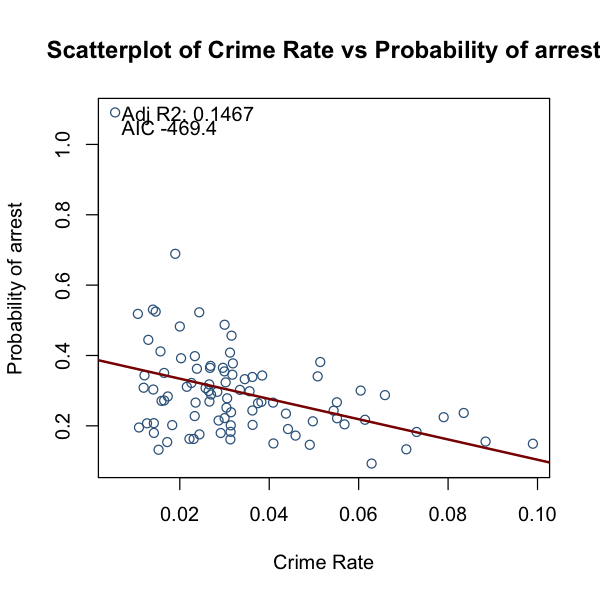

In [111]:
b1 <- sum( (crmrte-mean(crmrte))*(prbarr-mean(prbarr)) ) / sum( (crmrte-mean(crmrte))^2)
b0 <- mean(prbarr)-b1*mean(crmrte)
# paste('Beta_0: ', b0)
# paste('Beta_1: ', b1)

model <- lm(prbarr ~ crmrte)
# coef(model)
options(repr.plot.width=5, repr.plot.height=5)
plot(crmrte, prbarr, col="steelblue4", main="Scatterplot of Crime Rate vs Probability of arrest",
     xlab="Crime Rate",ylab="Probability of arrest")
abline(model,col="darkred",lwd=2)
legend("topleft", bty="n", legend=paste(c("Adj R2:", "AIC"),
        c(format(summary(model)$adj.r.squared, digits=4), format(AIC(model1), digits=4))))

# cor(crmrte,model$residuals)

# paste("R squared value for Probabity of arrest: ")
# summary(model)$r.squared # shows this variable accounts for over 15% of variation in crime rate
# paste("AIC value for Probability of arrest: ")
# AIC(model1)

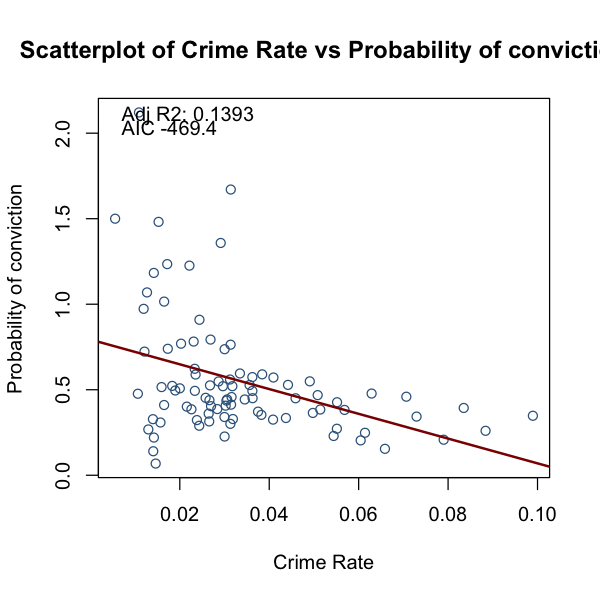

In [109]:
b1 <- sum( (crmrte-mean(crmrte))*(prbconv-mean(prbconv)) ) / sum( (crmrte-mean(crmrte))^2)
b0 <- mean(prbconv)-b1*mean(crmrte)
# paste('Beta_0: ', b0)
# paste('Beta_1: ', b1)

model <- lm(prbconv ~ crmrte)
# coef(model)
options(repr.plot.width=5, repr.plot.height=5)
plot(crmrte, prbconv, col="steelblue4", main="Scatterplot of Crime Rate vs Probability of conviction",
     xlab="Crime Rate",ylab="Probability of conviction")
abline(model,col="darkred",lwd=2)
legend("topleft", bty="n", legend=paste(c("Adj R2:", "AIC"),
        c(format(summary(model)$adj.r.squared, digits=4), format(AIC(model1), digits=4))))

# cor(crmrte,model$residuals)

# paste("R squared value for Probabity of conviction: ")
# summary(model)$r.squared # shows this variable accounts for about 15% of variation in crime rate
# paste("AIC value for Probability of conviction: ")
# AIC(model)

We will use the scatterplotMatrix from the car library to quickly assess and view potential relationships between other variables and the crime rate (crmrte). To do this, we simply set the crime rate variable (crmrte) as the first variable in each scatterplotMatrix so that the first row will always show the relationship of any independent variable to dependent variable crime rate. The analysis can be seen below:

ScatterPlotMatrix: Each Row: Same variable on Y axis, all the other variables on X axis

Warning message in applyDefaults(diagonal, defaults = list(method = "adaptiveDensity"), :
“unnamed diag arguments, will be ignored”

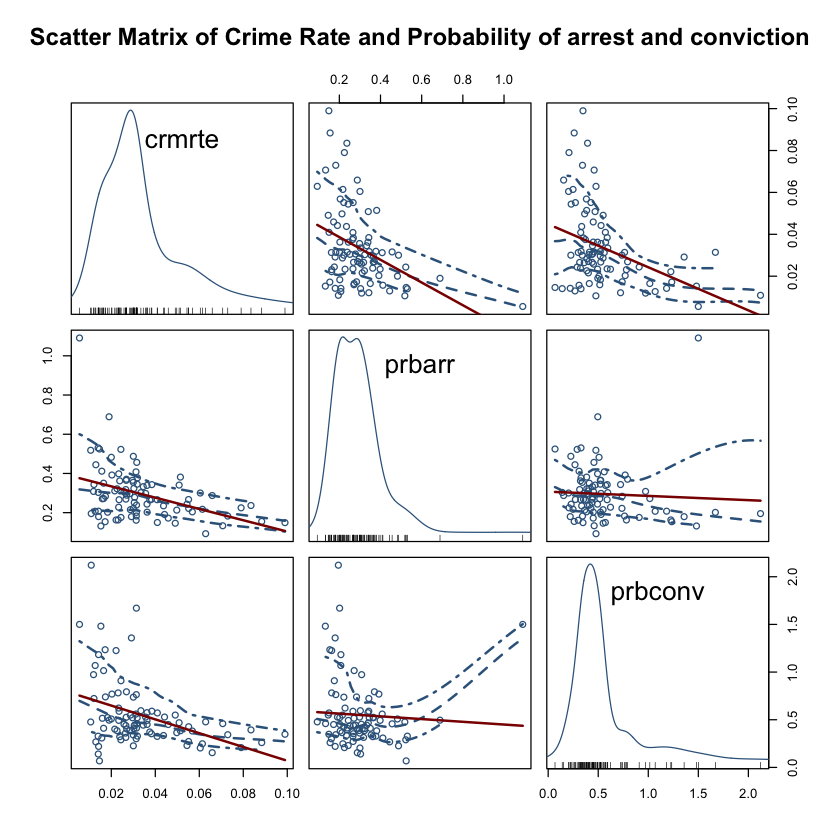

In [120]:
cat ("ScatterPlotMatrix: Each Row: Same variable on Y axis, all the other variables on X axis")

options(repr.plot.width=NULL, repr.plot.height=NULL)
scatterplotMatrix(crime_df[,c('crmrte', 'prbarr', 'prbconv')], diagonal = "histogram", 
                  main='Scatter Matrix of Crime Rate and Probability of arrest and conviction', 
                  regLine = list(col='darkred'), col=c("steelblue4"))


Overview of Probability of arrest
                        Dependent variable:    
                    ---------------------------
                              crmrte           
-----------------------------------------------
prbarr                       -0.054***         
                              (0.013)          
                                               
Constant                     0.050***          
                              (0.004)          
                                               
-----------------------------------------------
Observations                    90             
R2                             0.156           
Adjusted R2                    0.147           
Residual Std. Error       0.017 (df = 88)      
F Statistic           16.296*** (df = 1; 88)   
Note:               *p<0.1; **p<0.05; ***p<0.01


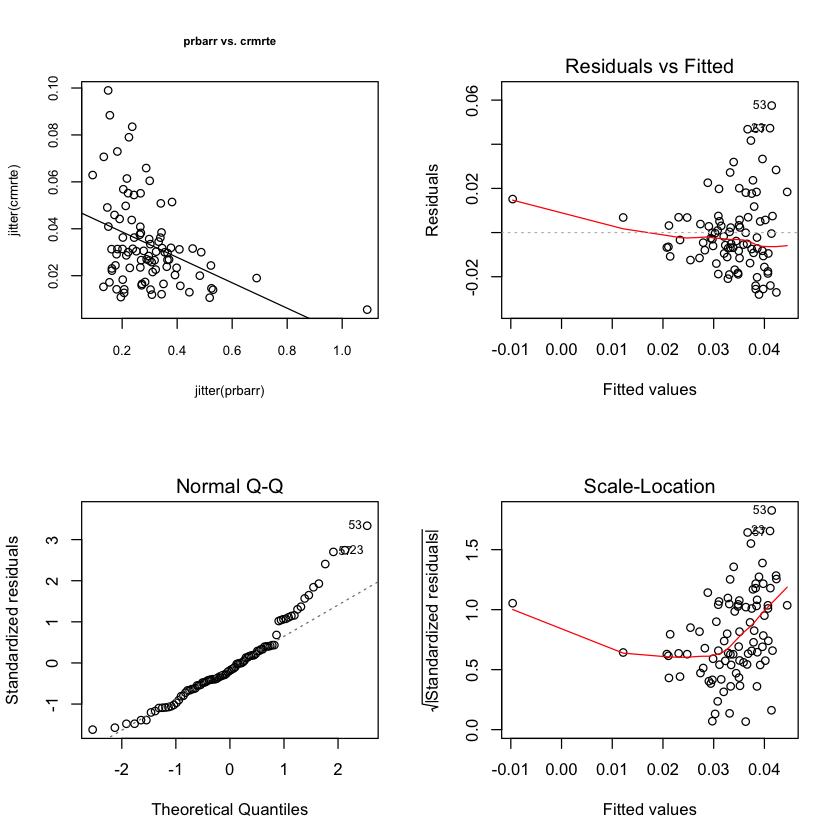

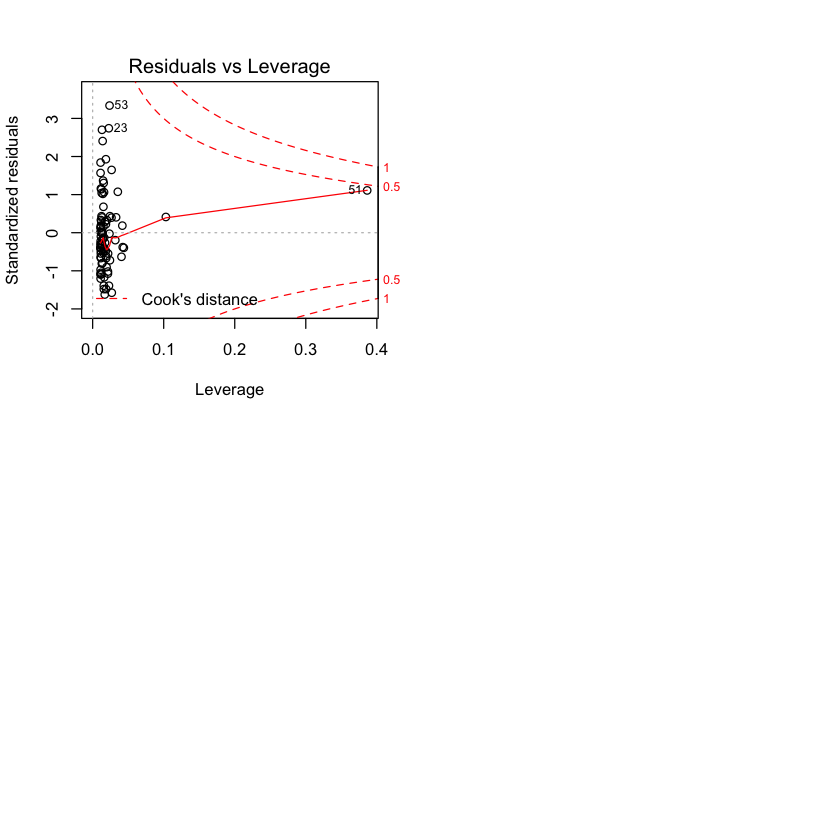

In [129]:
par(mfrow=c(2,2))
options(repr.plot.width=NULL, repr.plot.height=NULL)
plot(jitter(prbarr), jitter(crmrte), main="prbarr vs. crmrte", cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8, 
     cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8)
model1 = lm(crmrte ~ prbarr, data = crime_df)
abline(model1)
# plot(model1, which = 5, cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8, cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8)
plot(model1)     
stargazer(model1, type = 'text', title = "Overview of Probability of arrest",
          header = FALSE)



Overview of Probability of conviction
                        Dependent variable:    
                    ---------------------------
                              crmrte           
-----------------------------------------------
prbconv                      -0.021***         
                              (0.005)          
                                               
Constant                     0.045***          
                              (0.003)          
                                               
-----------------------------------------------
Observations                    90             
R2                             0.149           
Adjusted R2                    0.139           
Residual Std. Error       0.018 (df = 88)      
F Statistic           15.404*** (df = 1; 88)   
Note:               *p<0.1; **p<0.05; ***p<0.01


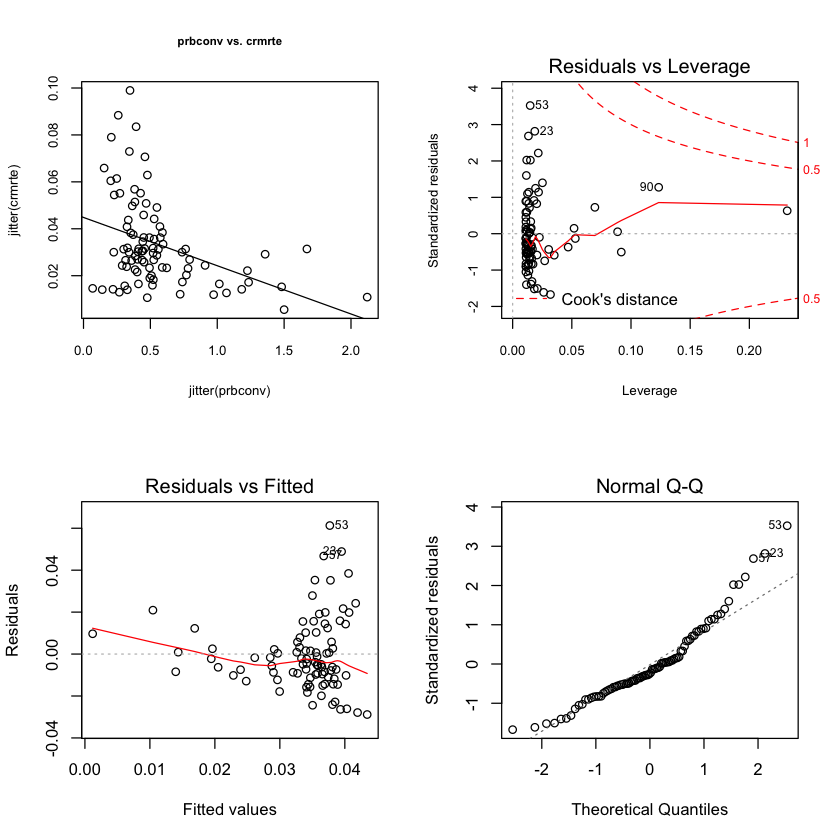

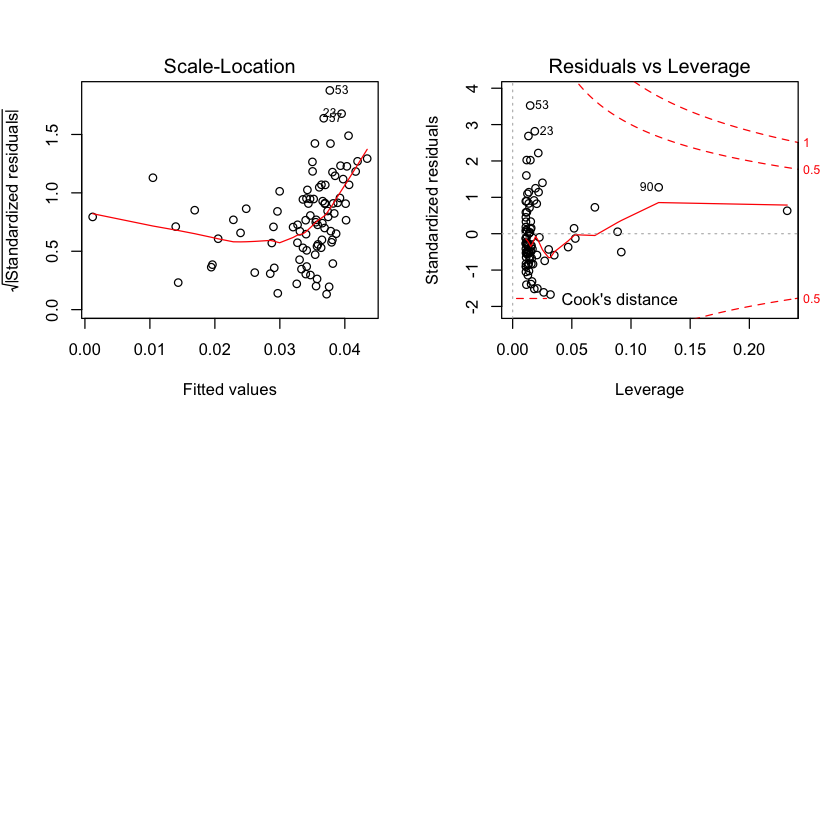

In [85]:
par(mfrow=c(2,2))
options(repr.plot.width=NULL, repr.plot.height=NULL)
plot(jitter(prbconv), jitter(crmrte), main="prbconv vs. crmrte", cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8)
model2 = lm(crmrte ~ prbconv, data = crime_df)
abline(model2)
plot(model2, which = 5, cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8, cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8)
plot(model2)
stargazer(model2, type = 'text', title = "Overview of Probability of conviction",
          header = FALSE)

In [41]:
density1 <- (
ggplot(crime_df, aes(x=density)) + geom_histogram(bins=50, color="black", fill="steelblue4") + xlab("density") + scale_x_continuous(limits=c(0.00002, 9)) + ylab("Frequency") +
ggtitle("Distribution of Desity")
)

In [66]:

density2 <- (
ggplot(crime_df, aes(y=density)) + 
  geom_boxplot(outlier.colour="steelblue4", outlier.shape=8,
                outlier.size=1.5)  + ggtitle("Distribution of density")
)

In [67]:
pctymle1 <- (
ggplot(crime_df, aes(x=pctymle)) + geom_histogram(bins=50, color="black", fill="steelblue4") + xlab("percent young male") + scale_x_continuous(limits=c(0.060, 0.25)) + ylab("Frequency") +
ggtitle("Distribution of percent young male")
)

In [68]:

pctymle2 <- (
ggplot(crime_df, aes(y=pctymle)) + 
  geom_boxplot(outlier.colour="steelblue4", outlier.shape=8,
                outlier.size=1.5)  + ggtitle("Distribution of percent young male")
)

Warning message:
“Removed 2 rows containing missing values (geom_bar).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

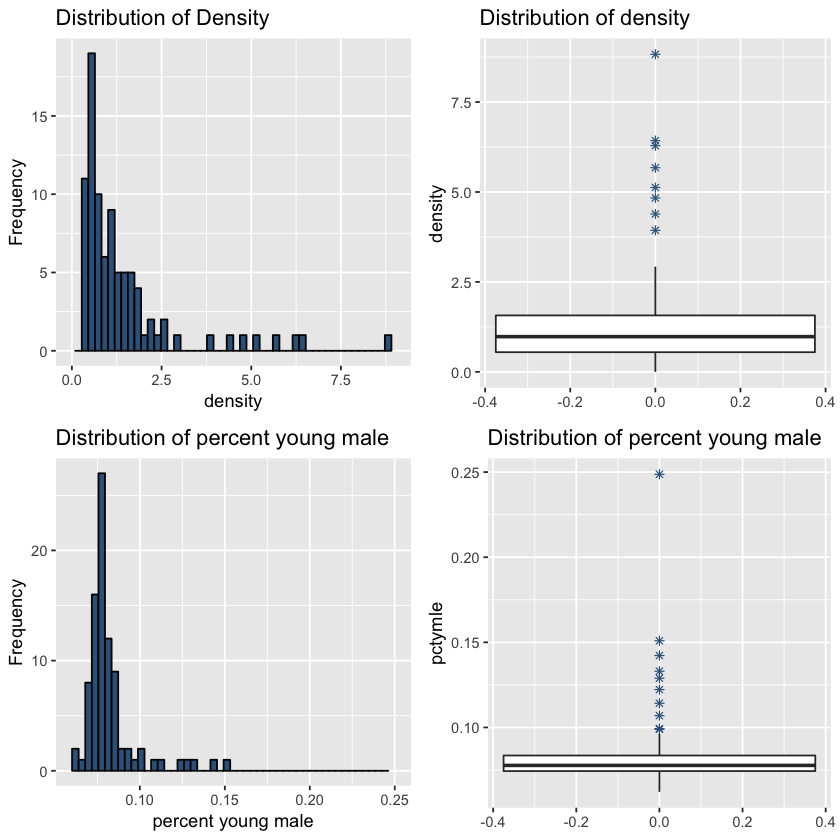

In [69]:
options(repr.plot.width=NULL, repr.plot.height=NULL)
grid.arrange(density1, density2, pctymle1, pctymle2, ncol=2, heights=c(2,2))

In [143]:
#### Bi-Variate models

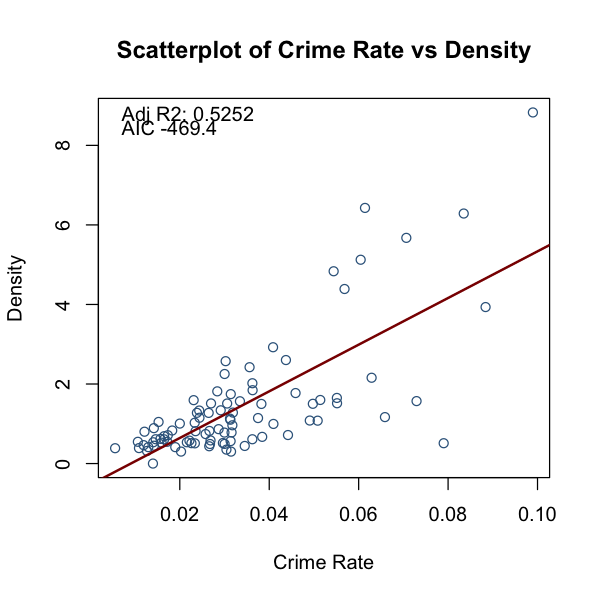

In [112]:
b1 <- sum( (crmrte-mean(crmrte))*(density-mean(density)) ) / sum( (crmrte-mean(crmrte))^2)
b0 <- mean(density)-b1*mean(crmrte)
# paste('Beta_0: ', b0)
# paste('Beta_1: ', b1)

model <- lm(density ~ crmrte)
# coef(model)
options(repr.plot.width=5, repr.plot.height=5)
plot(crmrte, density, col="steelblue4", main="Scatterplot of Crime Rate vs Density",
     xlab="Crime Rate",ylab="Density")
abline(model,col="darkred",lwd=2)
legend("topleft", bty="n", legend=paste(c("Adj R2:", "AIC"),
        c(format(summary(model)$adj.r.squared, digits=4), format(AIC(model1), digits=4))))


# cor(crmrte,model$residuals)

# paste("R squared value for Density: ")
# summary(model)$r.squared # shows this variable accounts for over 53% of variation in crime rate
# paste("AIC value for Density: ")
# AIC(model1)

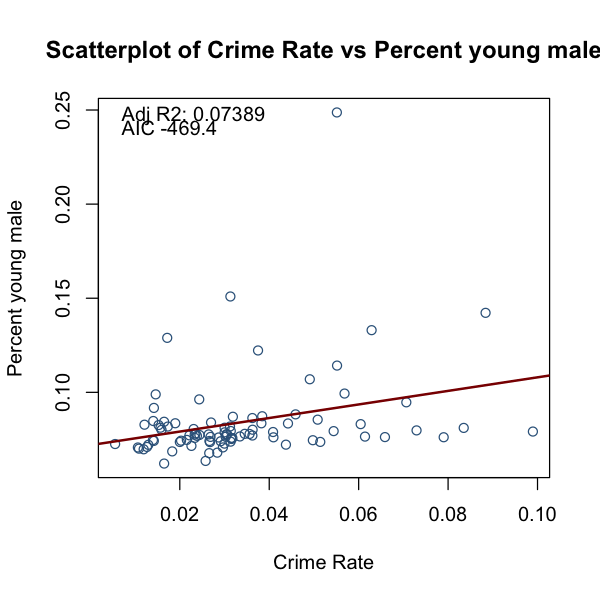

In [113]:
b1 <- sum( (crmrte-mean(crmrte))*(pctymle-mean(pctymle)) ) / sum( (crmrte-mean(crmrte))^2)
b0 <- mean(pctymle)-b1*mean(crmrte)
# paste('Beta_0: ', b0)
# paste('Beta_1: ', b1)

model <- lm(pctymle ~ crmrte)
# coef(model)
options(repr.plot.width=5, repr.plot.height=5)
plot(crmrte, pctymle, col="steelblue4", main="Scatterplot of Crime Rate vs Percent young male",
     xlab="Crime Rate",ylab="Percent young male")
abline(model,col="darkred",lwd=2)
legend("topleft", bty="n", legend=paste(c("Adj R2:", "AIC"),
        c(format(summary(model)$adj.r.squared, digits=4), format(AIC(model1), digits=4))))

# cor(crmrte,model$residuals)

# paste("R squared value for Percent young male: ")
# summary(model)$r.squared # shows this variable accounts for over 8% of variation in crime rate
# paste("AIC value for Percent young male: ")
# AIC(model1)

ScatterPlotMatrix: Each Row: Same variable on Y axis, all the other variables on X axis

Warning message in applyDefaults(diagonal, defaults = list(method = "adaptiveDensity"), :
“unnamed diag arguments, will be ignored”

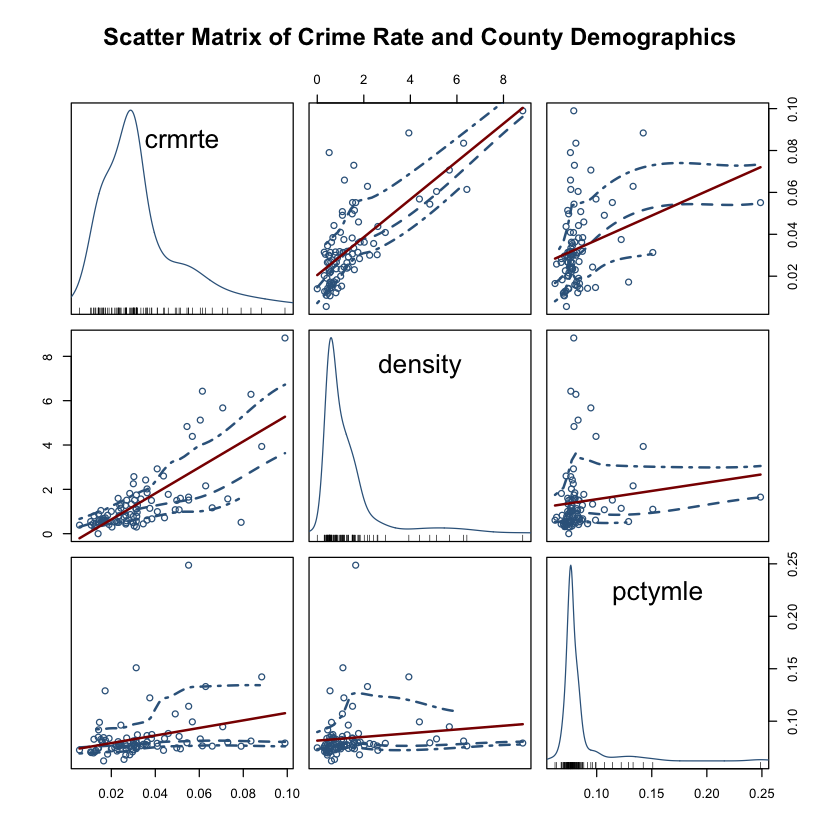

In [70]:
options(repr.plot.width=NULL, repr.plot.height=NULL)
cat ("ScatterPlotMatrix: Each Row: Same variable on Y axis, all the other variables on X axis")

scatterplotMatrix(crime_df[,c('crmrte','density','pctymle')], diagonal = "histogram"
                  , main='Scatter Matrix of Crime Rate and County Demographics',
                 regLine = list(col='darkred'), col=c("steelblue4"))

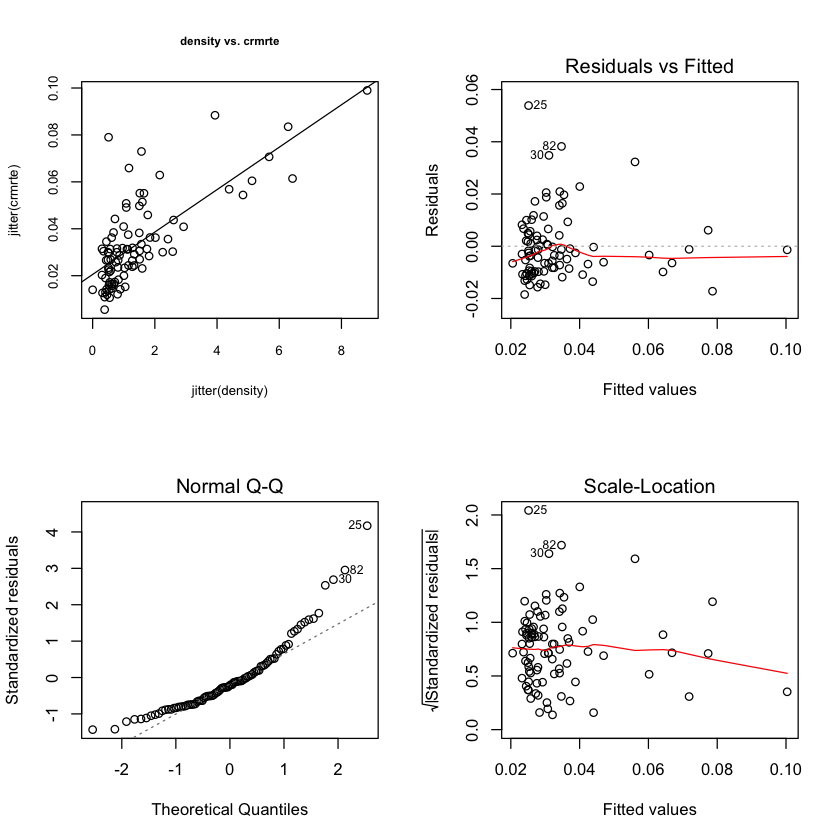

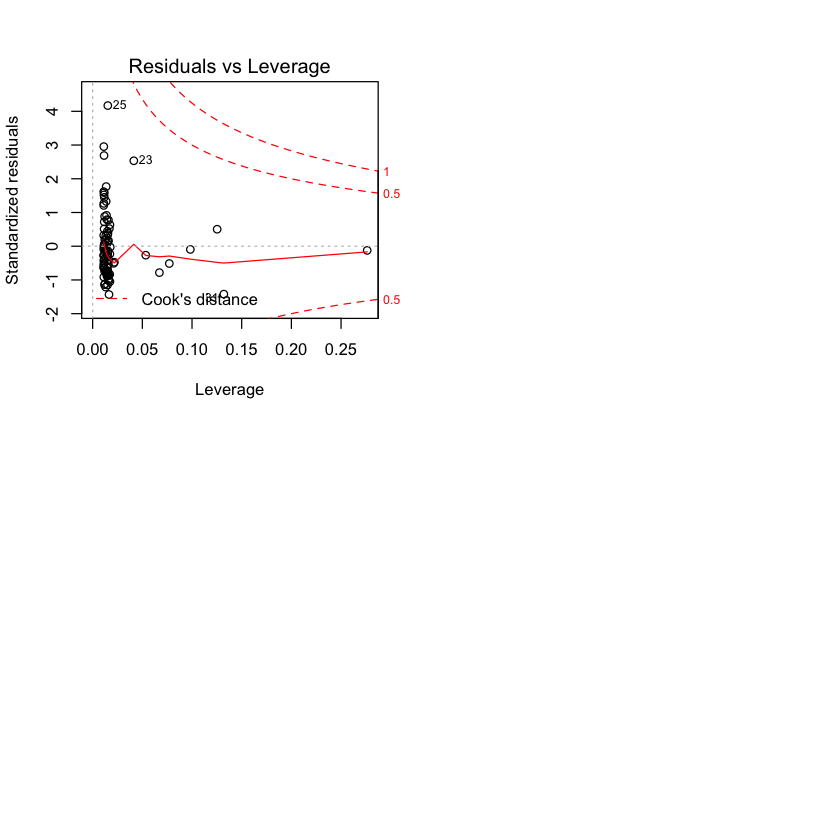

In [128]:
par(mfrow=c(2,2))
options(repr.plot.width=NULL, repr.plot.height=NULL)
plot(jitter(density), jitter(crmrte), main="density vs. crmrte", cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8)
model6 = lm(crmrte ~ density, data = crime_df)
abline(model6)
# plot(model6, which = 5, cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8, cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8)
plot(model6)

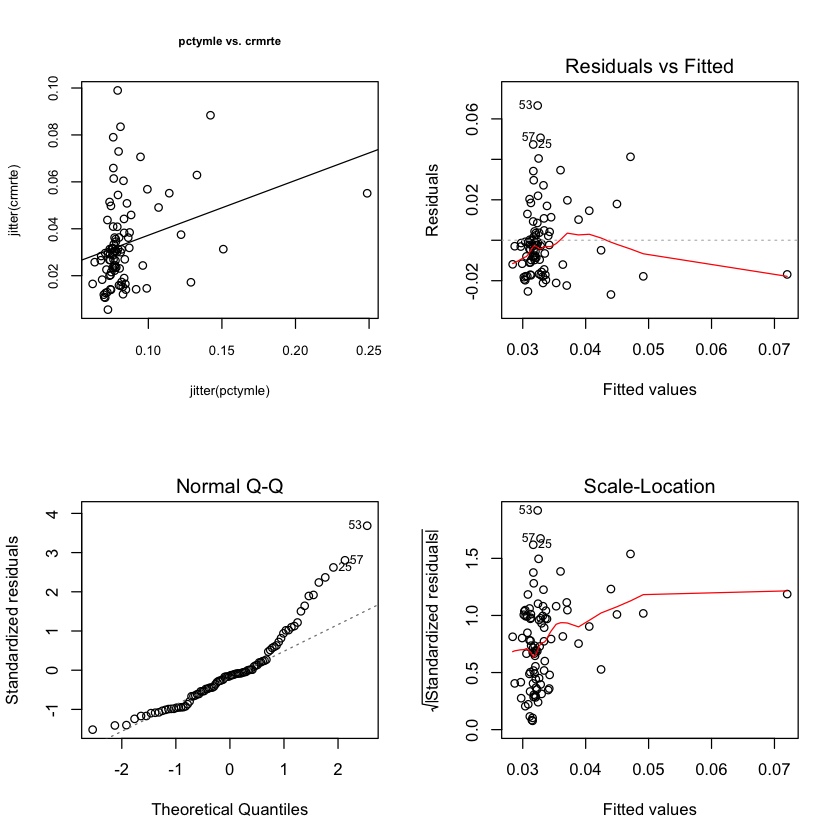

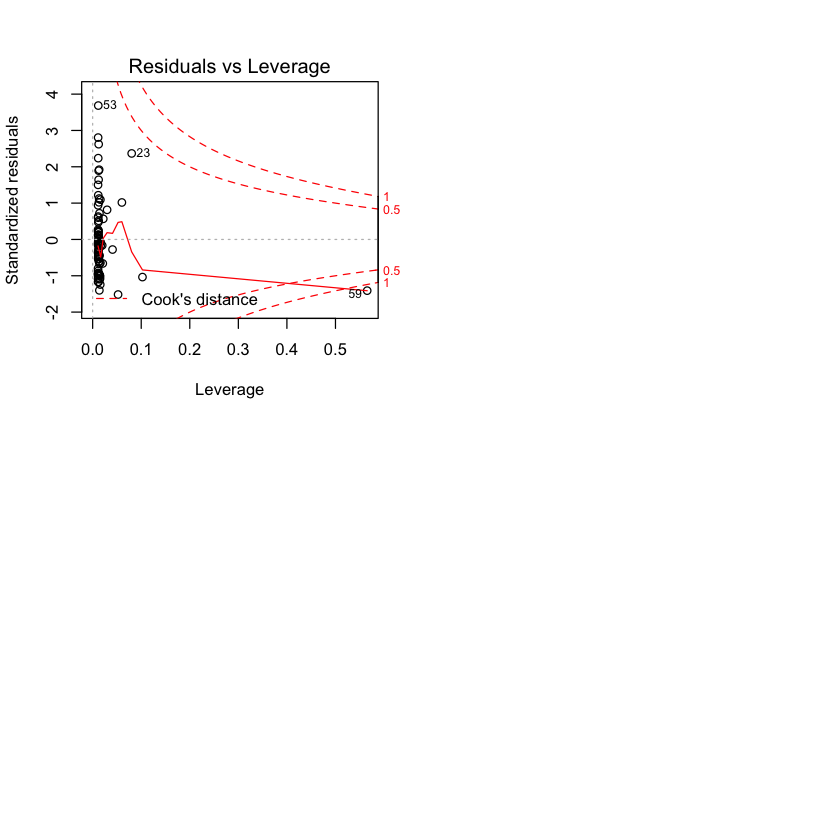

In [127]:
par(mfrow=c(2,2))
options(repr.plot.width=NULL, repr.plot.height=NULL)
plot(jitter(pctymle), jitter(crmrte), main="pctymle vs. crmrte", cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8)
model22 = lm(crmrte ~ pctymle, data = crime_df)
abline(model22)
# plot(model22, which = 5, cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8, cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8)
plot(model22)

In [77]:
polpc1 <- (
ggplot(crime_df, aes(x=polpc)) + geom_histogram(bins=50, color="black", fill="steelblue4") + xlab("polpc") + scale_x_continuous(limits=c(0.001, 0.010)) + ylab("Frequency") +
ggtitle("Distribution of Police per capita")
)

In [78]:

polpc2 <- (
ggplot(crime_df, aes(x=crmrte, y=polpc)) + 
  geom_boxplot(outlier.colour="steelblue4", outlier.shape=8,
                outlier.size=1.5)  + ggtitle("Distribution of Police per capita")
)

In [79]:
taxpc1 <- (
ggplot(crime_df, aes(x=taxpc)) + geom_histogram(bins=50, color="black", fill="steelblue4") + xlab("taxpc") + scale_x_continuous(limits=c(38, 120)) + ylab("Frequency") +
ggtitle("Distribution of Tax revenue per capita")
)

In [80]:

taxpc2 <- (
ggplot(crime_df, aes(x=crmrte, y=taxpc)) + 
  geom_boxplot(outlier.colour="steelblue4", outlier.shape=8,
                outlier.size=1.5)  + ggtitle("Distribution of Tax revenue per capita")
)

In [81]:
wavg1 <- (
ggplot(crime_df, aes(x=wavg)) + geom_histogram(bins=50, color="black", fill="steelblue4") + xlab("wavg") + scale_x_continuous(limits=c(260, 498)) + ylab("Frequency") +
ggtitle("Distribution of Average wage")
)

In [82]:

wavg2 <- (
ggplot(crime_df, aes(x=crmrte, y=wavg)) + 
  geom_boxplot(outlier.colour="steelblue4", outlier.shape=8,
                outlier.size=1.5)  + ggtitle("Distribution of Average wage")
)

Warning message:
“Removed 5 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”Warning message:
“Removed 58 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”

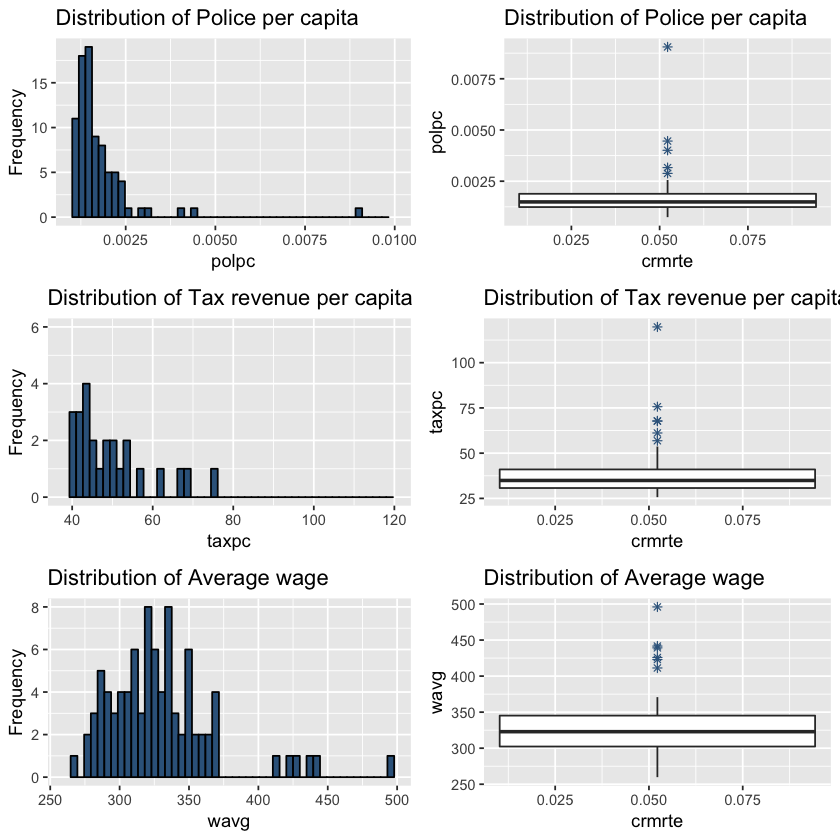

In [83]:
options(repr.plot.width=NULL, repr.plot.height=NULL)
grid.arrange(polpc1, polpc2, taxpc1, taxpc2, wavg1, wavg2, ncol=2)

#### Bi-Variate models

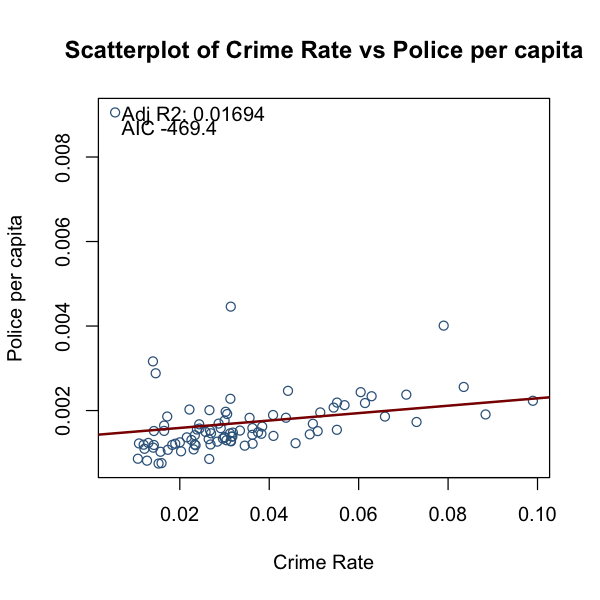

In [114]:
b1 <- sum( (crmrte-mean(crmrte))*(polpc-mean(polpc)) ) / sum( (crmrte-mean(crmrte))^2)
b0 <- mean(polpc)-b1*mean(crmrte)
# paste('Beta_0: ', b0)
# paste('Beta_1: ', b1)

model <- lm(polpc ~ crmrte)
# coef(model)
options(repr.plot.width=5, repr.plot.height=5)
plot(crmrte, polpc, col="steelblue4", main="Scatterplot of Crime Rate vs Police per capita",
     xlab="Crime Rate",ylab="Police per capita")
abline(model,col="darkred",lwd=2)
legend("topleft", bty="n", legend=paste(c("Adj R2:", "AIC"),
        c(format(summary(model)$adj.r.squared, digits=4), format(AIC(model1), digits=4))))

# cor(crmrte,model$residuals)

# paste("R squared value for Police per capita: ")
# summary(model)$r.squared # shows this variable accounts for over 53% of variation in crime rate
# paste("AIC value for Police per capita: ")
# AIC(model1)

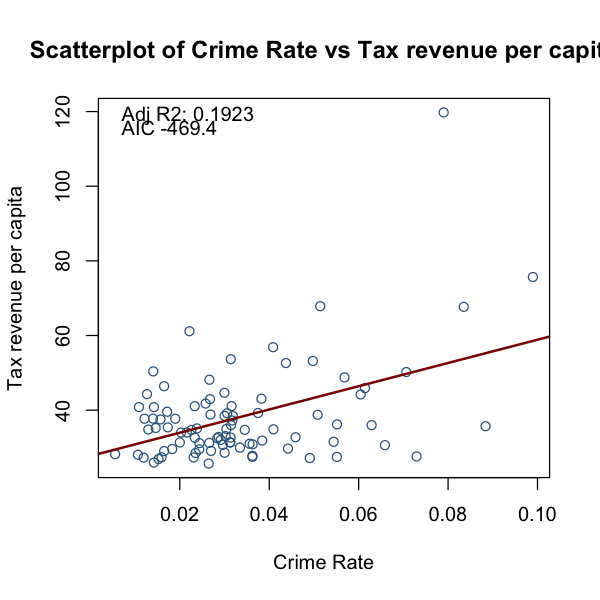

In [115]:
b1 <- sum( (crmrte-mean(crmrte))*(taxpc-mean(taxpc)) ) / sum( (crmrte-mean(crmrte))^2)
b0 <- mean(taxpc)-b1*mean(crmrte)
# paste('Beta_0: ', b0)
# paste('Beta_1: ', b1)

model <- lm(taxpc ~ crmrte)
# coef(model)
options(repr.plot.width=5, repr.plot.height=5)
plot(crmrte, taxpc, col="steelblue4", main="Scatterplot of Crime Rate vs Tax revenue per capita",
     xlab="Crime Rate",ylab="Tax revenue per capita")
abline(model,col="darkred",lwd=2)
legend("topleft", bty="n", legend=paste(c("Adj R2:", "AIC"),
        c(format(summary(model)$adj.r.squared, digits=4), format(AIC(model1), digits=4))))

# cor(crmrte,model$residuals)

# paste("R squared value for Tax revenue per capita: ")
# summary(model)$r.squared # shows this variable accounts for over 53% of variation in crime rate
# paste("AIC value for Tax revenue per capita: ")
# AIC(model1)

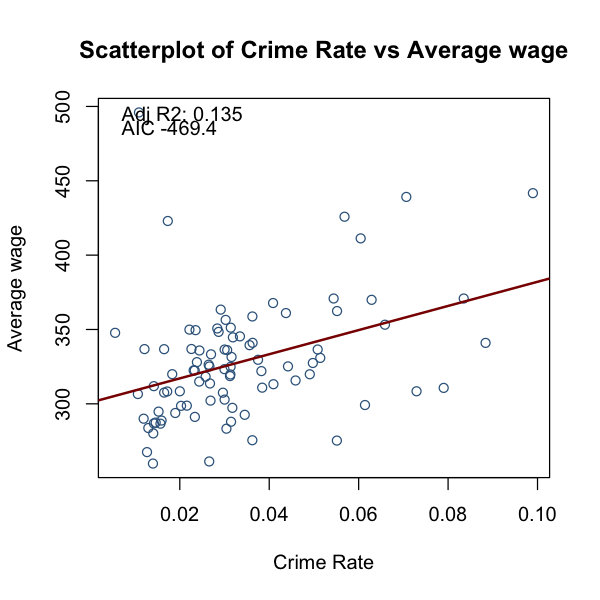

In [116]:
b1 <- sum( (crmrte-mean(crmrte))*(crime_df$wavg-mean(crime_df$wavg)) ) / sum( (crmrte-mean(crmrte))^2)
b0 <- mean(crime_df$wavg)-b1*mean(crmrte)
# paste('Beta_0: ', b0)
# paste('Beta_1: ', b1)

model <- lm(crime_df$wavg ~ crmrte)
# coef(model)
options(repr.plot.width=5, repr.plot.height=5)
plot(crmrte, crime_df$wavg, col="steelblue4", main="Scatterplot of Crime Rate vs Average wage",
     xlab="Crime Rate",ylab="Average wage")
abline(model,col="darkred",lwd=2)
legend("topleft", bty="n", legend=paste(c("Adj R2:", "AIC"),
        c(format(summary(model)$adj.r.squared, digits=4), format(AIC(model1), digits=4))))

# cor(crmrte,model$residuals)

# paste("R squared value for Average wage: ")
# summary(model)$r.squared # shows this variable accounts for over 53% of variation in crime rate
# paste("AIC value for Average wage: ")
# AIC(model1)

ScatterPlotMatrix: Each Row: Same variable on Y axis, all the other variables on X axis

Warning message in applyDefaults(diagonal, defaults = list(method = "adaptiveDensity"), :
“unnamed diag arguments, will be ignored”

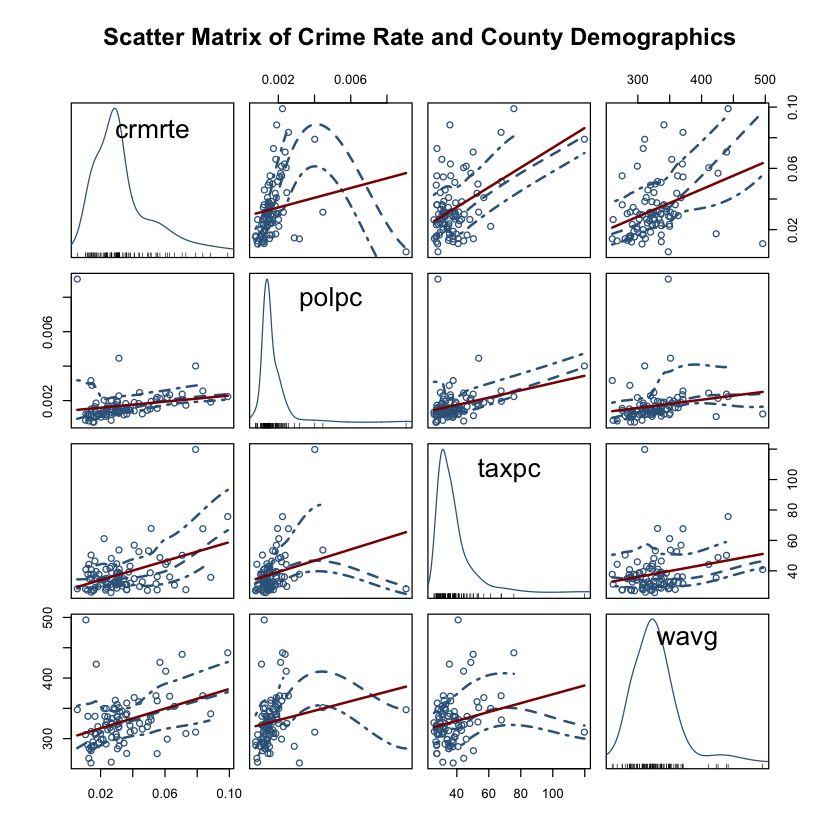

In [84]:
options(repr.plot.width=NULL, repr.plot.height=NULL)
cat ("ScatterPlotMatrix: Each Row: Same variable on Y axis, all the other variables on X axis")

scatterplotMatrix(crime_df[,c('crmrte','polpc','taxpc', 'wavg')], diagonal = "histogram"
                  , main='Scatter Matrix of Crime Rate and County Demographics',
                 regLine = list(col='darkred'), col=c("steelblue4"))

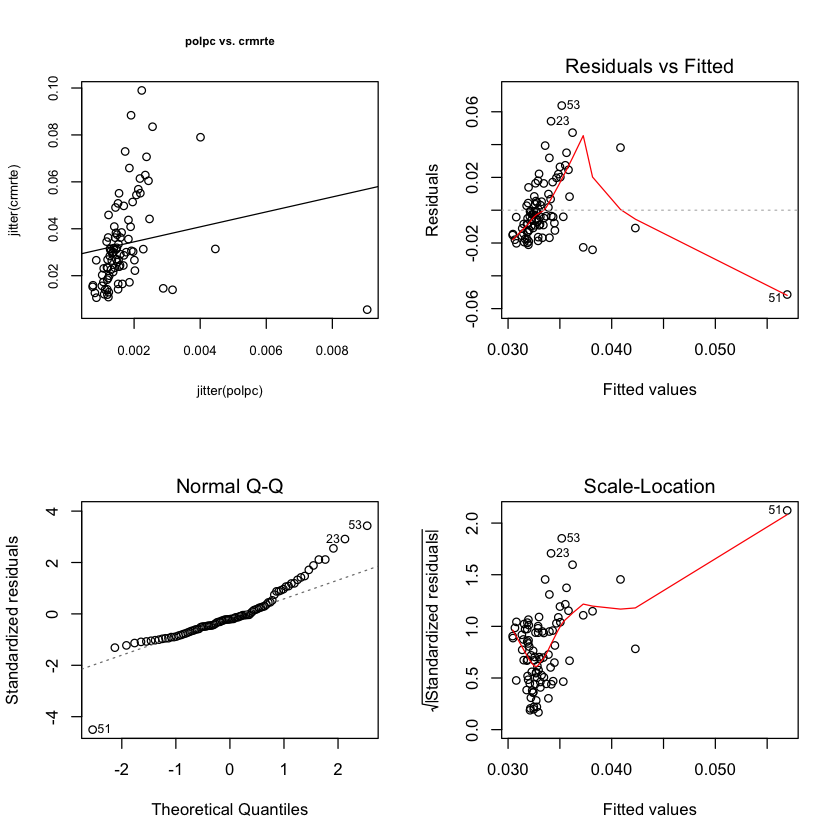

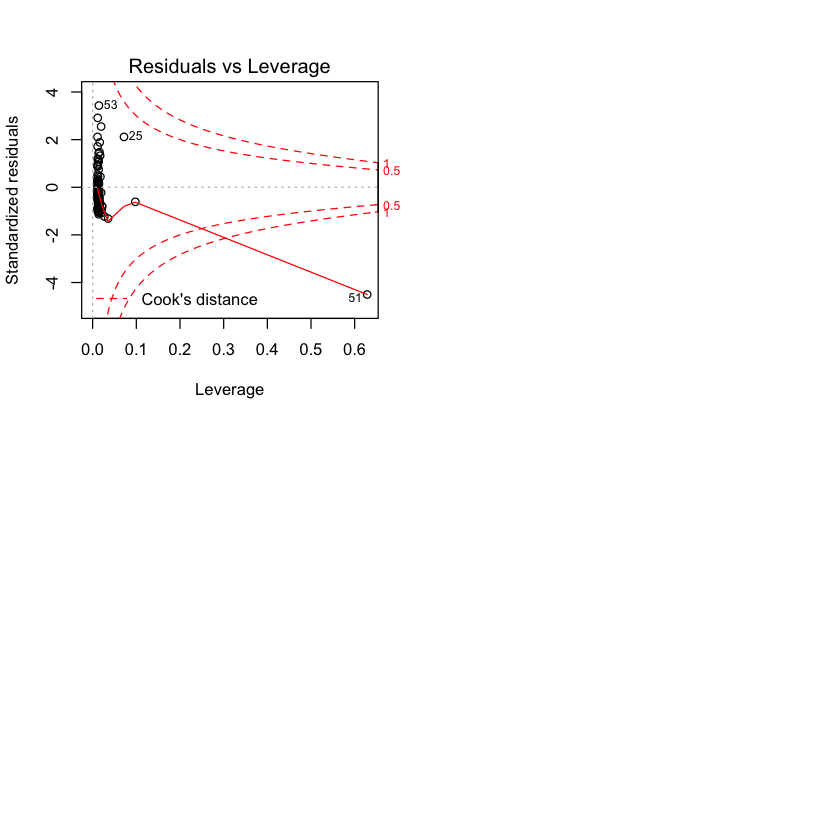

In [126]:
par(mfrow=c(2,2))
options(repr.plot.width=NULL, repr.plot.height=NULL)
plot(jitter(polpc), jitter(crmrte), main="polpc vs. crmrte", cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8)
model5 = lm(crmrte ~ polpc, data = crime_df)
abline(model5)
# plot(model5, which = 5, cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8, cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8)
plot(model5)


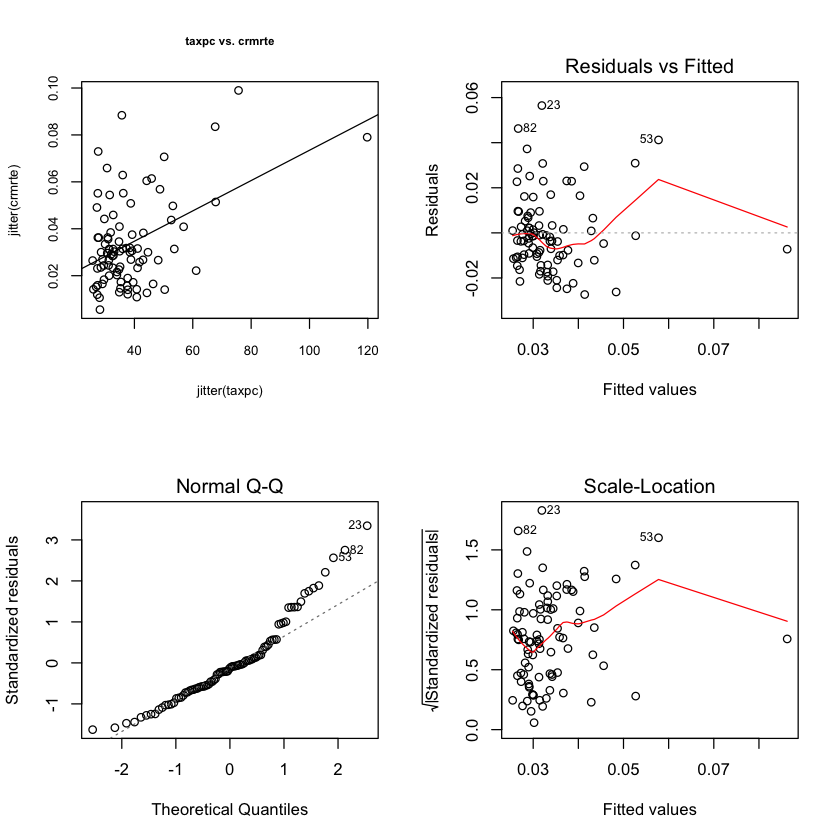

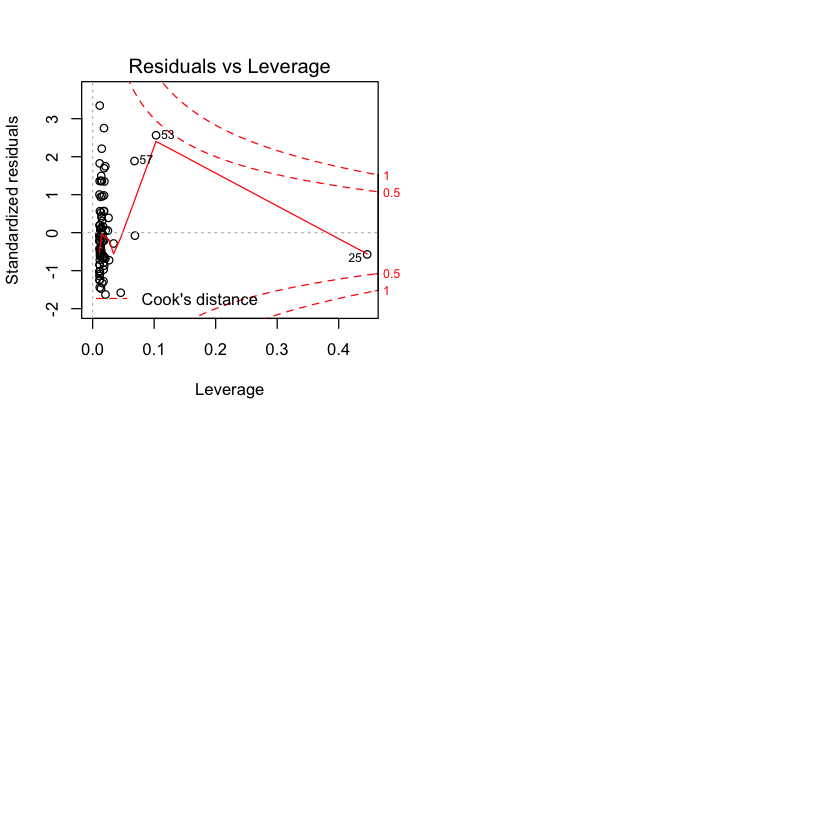

In [125]:
par(mfrow=c(2,2))
options(repr.plot.width=NULL, repr.plot.height=NULL)
plot(jitter(taxpc), jitter(crmrte), main="taxpc vs. crmrte", cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8)
model7 = lm(crmrte ~ taxpc, data = crime_df)
abline(model7)
# plot(model7, which = 5, cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8, cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8)
plot(model7)


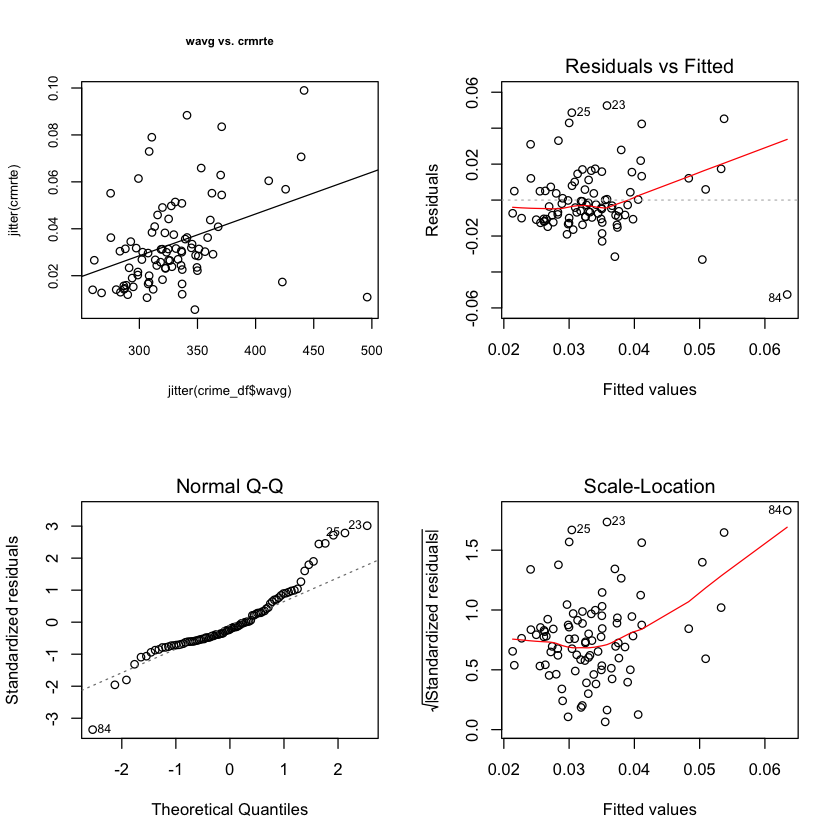

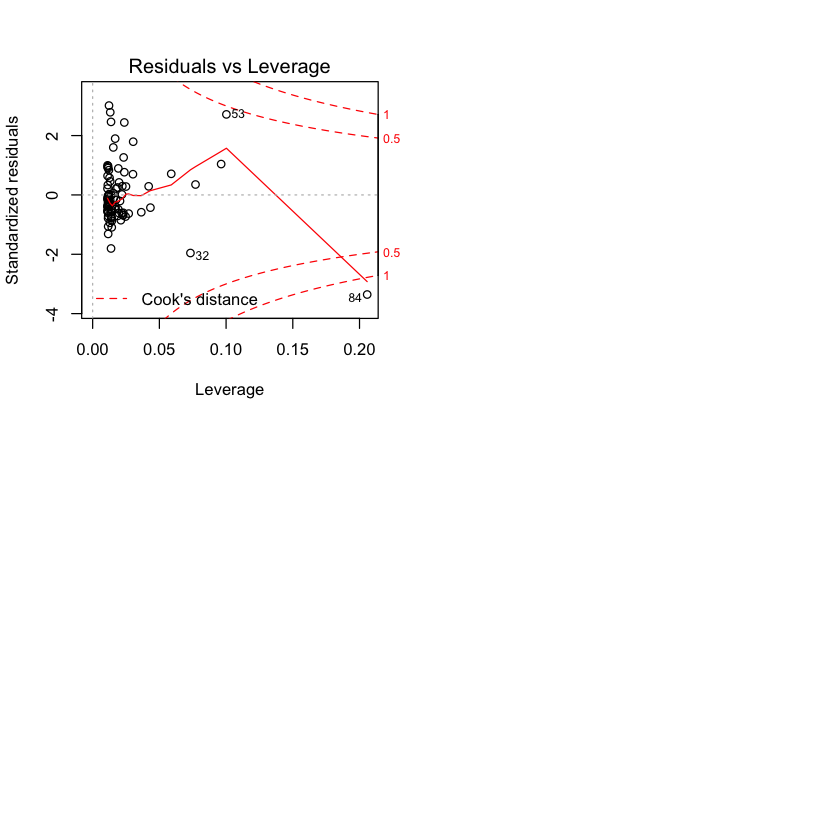

In [124]:
par(mfrow=c(2,2))
options(repr.plot.width=NULL, repr.plot.height=NULL)
plot(jitter(crime_df$wavg), jitter(crmrte), main="wavg vs. crmrte", cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8)
model5 = lm(crmrte ~ crime_df$wavg, data = crime_df)
abline(model5)
# plot(model5, which = 5, cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8, cex.lab=.8, cex.axis=.8, cex.main=.7, cex.sub=0.8)
plot(model5)

#### add a table to corr
#### add observation

### Note: We are showing a full set of scatterplots below, we looked at them in a isolated bivariate fashion for our analysis

> Basic EDA showed that crime rate is strongly correlacted with the following fields which we decided to research further. <br>
> prbarr
> prbconv
> prbpris 0.35   
> density 0.74
> pctmin80
> taxpc 0.57   
> urban 0.59      
> pctymle 0.47<br>
> Urban and density has the highest correlations with crime rate. However, urban and density also has strong correlation to each other. Therefore, it is not clear if urban is strong correlated to crime rate because of it has strong correlation to density. <br>
> It appears that wages are also positively correlated with crime rate, urban and density, which might be caused by higher wages in urban area. <br>
> We will start the research by creating the models between crime rate and each set of features.


### Regression Models
#### Model 1 - key variables (Density and Urban) 
##### These two variables have the strongest correlations with crime rate, therefore, we will be exploring these two variables in our baseline model. From the EDA, it appeared that crime rate is showing nonlinear patterns. Therefore, we will also test log transformation on Crime Rate, which should help make data conform to normality and also log-transformation will remove or reduce skewness. 

> baseline model without log transformation

In [89]:
model1 <- lm(crmrte ~ urban + density ,  data=crime_df)
paste("R squared value: ")
summary(model1)$r.square
paste()

[1] "R squared value: "

[1] 0.5314859

character(0)

In [66]:
stargazer(model1, type = 'text',  title="Results", align=TRUE)


Results
                        Dependent variable:    
                    ---------------------------
                              crmrte           
-----------------------------------------------
urban                          0.004           
                              (0.008)          
                                               
density                      0.008***          
                              (0.002)          
                                               
Constant                     0.021***          
                              (0.002)          
                                               
-----------------------------------------------
Observations                    90             
R2                             0.531           
Adjusted R2                    0.521           
Residual Std. Error       0.013 (df = 87)      
F Statistic           49.347*** (df = 2; 87)   
Note:               *p<0.1; **p<0.05; ***p<0.01


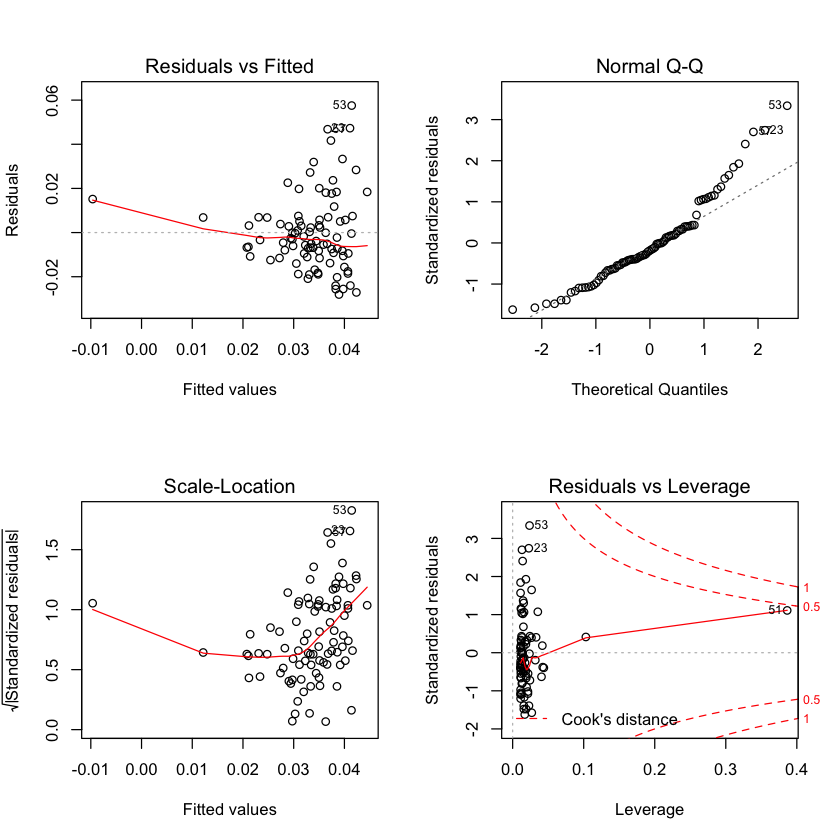

In [122]:
par(mfrow=c(2,2))
options(repr.plot.width=NULL, repr.plot.height=NULL)
plot(model1)

> baseline model with log transformation

In [131]:
model1B <- lm(log(crmrte) ~ urban + density,  data=crime_df)
paste("R squared value: ")
summary(model1B)$r.square
paste()

[1] "R squared value: "

[1] 0.4030543

character(0)

In [132]:
stargazer(model1B, type = 'text',  title="Results", align=TRUE)


Results
                        Dependent variable:    
                    ---------------------------
                            log(crmrte)        
-----------------------------------------------
urban                         -0.162           
                              (0.278)          
                                               
density                      0.253***          
                              (0.052)          
                                               
Constant                     -3.891***         
                              (0.072)          
                                               
-----------------------------------------------
Observations                    90             
R2                             0.403           
Adjusted R2                    0.389           
Residual Std. Error       0.429 (df = 87)      
F Statistic           29.371*** (df = 2; 87)   
Note:               *p<0.1; **p<0.05; ***p<0.01


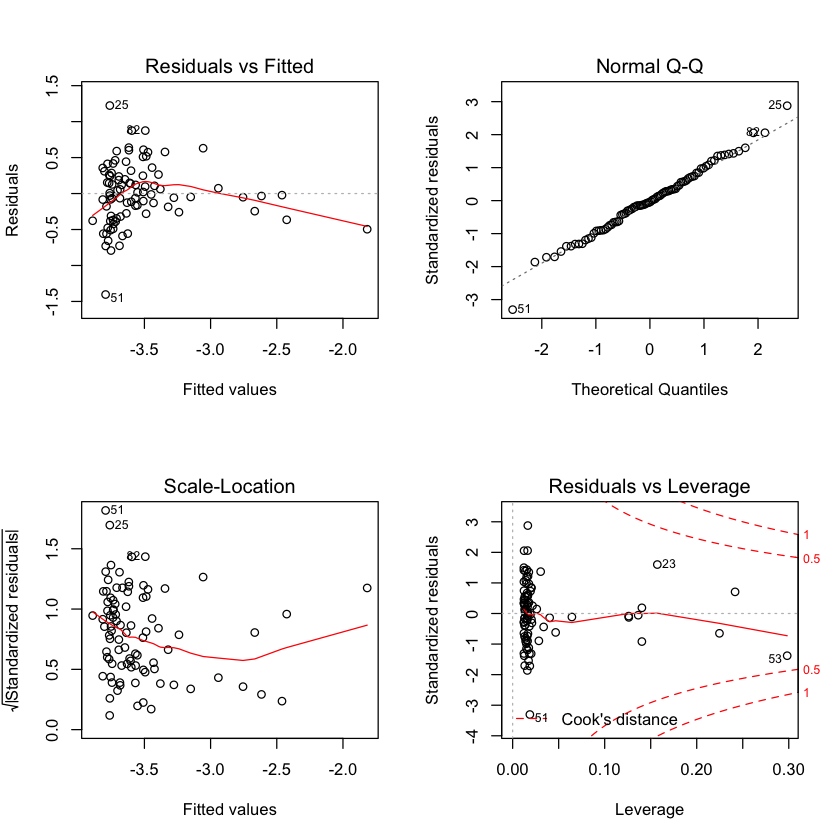

In [133]:
par(mfrow=c(2,2))
options(repr.plot.width=NULL, repr.plot.height=NULL)
plot(model1B)

> With log transformation, we actually got a much smaller R2 value and much higher Residual Std Error. Therefore, we decided go with the model without log transformation. 

#### MLR assumption validation --

> Assumption 1: Nonlinearity in Parameters -
Our EAD research has indictated that there are linear relationships between the independent variables and dependant variable. Our model1 is linear in parameters that was estimated using the OLS method. Therefore, we believe this assumption is satisfied. 


>Assumption 2: Random Sampling - We have assumed that the counties were selected randomly. There is no indication of any particular pattern or less randomness in the data which might indicate otherwise. So, we believe this assumption is satisfied. 

> Assumption 3: No Perfect Multicollinearity - We examed all variables and their correlation coefficients. We didn't find any perfect multicollinearity among them. Therefore, we believe this assumption is met. 

>Assumption 4: Zero Conditional Mean - ?

> Assumption 5: Homoskedasticity - The Residuals vs Fitted plot in (Cell 87 - how do we tage these) also shows appears to show some variation in the variance of the errors. We will perform a Breusch-Pagan test to verify homoskedasticity using the NULL hypothesis H0 : there is homoskedasticity and alternate hypothesis HA : there is heteroskedasticity.

> We did a Breusch-Pagan test to verify the homoskedasticity with hypothesis of homoskdasticity exists. Our P-Value is greater than 0.05 therefore, we failed to reject that hyphothesis. 

In [90]:
lmtest::bptest(model1)


	studentized Breusch-Pagan test

data:  model1
BP = 0.13946, df = 2, p-value = 0.9326


> Assumption 6: Normality of Errors - Our EDA showed that there are faily normal distribution of the errors with slight deviations. This assumption is met. 

>The study above shows that feature "urban" does not contribute to the model, which actually makes sense because urban is strongly correlated to density. It is possible that the previous correlation between urban crime rate we discovered in EDA was the result of strong correlation between urban and density. In our model two, we will remove urban and add the next group variables to make the model more robust. 

#### Model 2 - key variables (density, prbarr, parbconv, polpc) 
##### We removed urban from this model 2 because model 1 indicated that it does not contribute to the model. We included several addition variables because they also show strong correlation with crime rate. These additional three variables are all law reinforcement related, which in practical should have strong causal effects on crime rate.

> Model 2 model without log transformation

In [134]:
model2 <- lm(crmrte ~ prbarr+prbconv+polpc+density ,  data=crime_df)
paste("R squared value: ")
summary(model2)$r.square
paste()
AIC(model2)

[1] "R squared value: "

[1] 0.6994684

character(0)

[1] -556.2657

In [135]:
stargazer(model2, type = 'text',  title="Results", align=TRUE)


Results
                        Dependent variable:    
                    ---------------------------
                              crmrte           
-----------------------------------------------
prbarr                       -0.057***         
                              (0.010)          
                                               
prbconv                      -0.019***         
                              (0.003)          
                                               
polpc                        6.311***          
                              (1.409)          
                                               
density                      0.006***          
                              (0.001)          
                                               
Constant                     0.042***          
                              (0.004)          
                                               
-----------------------------------------------
Observations                   

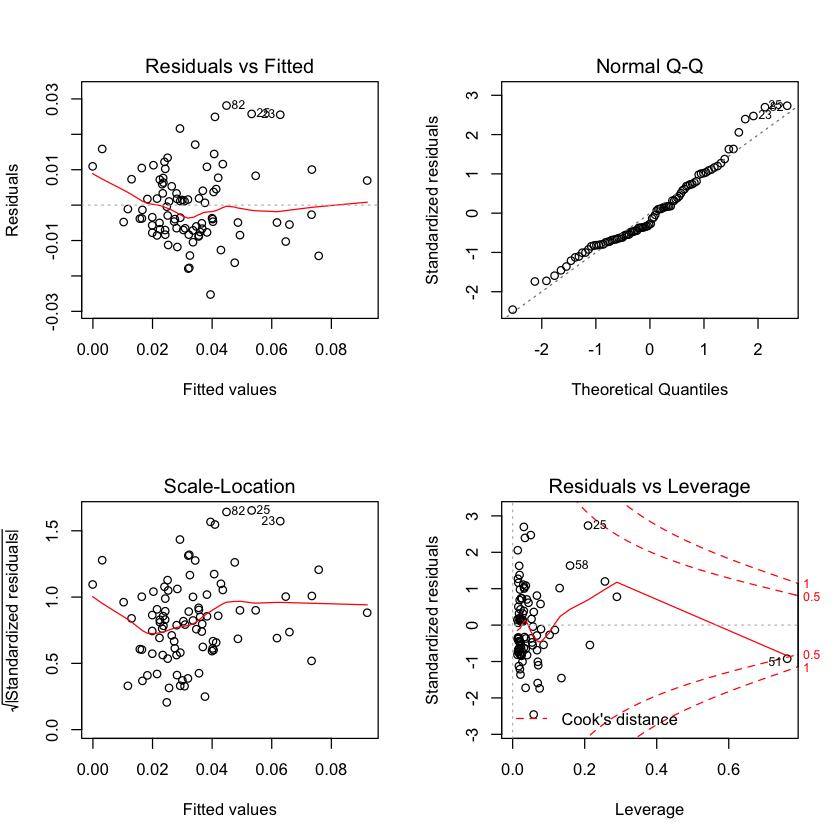

In [136]:
par(mfrow=c(2,2))
options(repr.plot.width=NULL, repr.plot.height=NULL)
plot(model2)

> By removing urban and adding three law enforcement related variables, the R2 increased to 0.69 and all terms are having p_value < 0.01, which might indicate that our model is becoming more accurate. 

> Model 2 with log transformation

In [101]:
model2B <- lm(log(crmrte) ~ prbarr+prbconv+polpc+density ,  data=crime_df)
paste("R squared value: ")
summary(model2B)$r.square
paste()
AIC(model2B)

[1] "R squared value: "

[1] 0.6510352

character(0)

[1] 63.63064

In [102]:
stargazer(model2B, type = 'text',  title="Results", align=TRUE)



Results
                        Dependent variable:    
                    ---------------------------
                            log(crmrte)        
-----------------------------------------------
prbarr                       -1.976***         
                              (0.324)          
                                               
prbconv                      -0.678***         
                              (0.109)          
                                               
polpc                       133.939***         
                             (44.103)          
                                               
density                      0.125***          
                              (0.028)          
                                               
Constant                     -2.992***         
                              (0.128)          
                                               
-----------------------------------------------
Observations                   

> the log tranformed model is giving us a smaller r2 and bigger AIC value. Therefore, we will use the model without transformation. 

#### MLR assumption validation --

> Assumption 3: No Perfect Multicollinearity - We examed all variables and their correlation coefficients. We didn't find any perfect multicollinearity among them. Therefore, we believe this assumption is met. 

>Assumption 4: Zero Conditional Mean - ?

> Assumption 5: Homoskedasticity - We did a Breusch-Pagan test to verify the homoskedasticity with hypothesis of homoskdasticity exists. Our P-Value is smaller than 0.05 therefore, we are able to reject that hyphothesis. So in model 2, this assumption is met

In [98]:
lmtest::bptest(model2)


	studentized Breusch-Pagan test

data:  model2
BP = 17.152, df = 4, p-value = 0.001806


> Assumption 6: Normality of Errors - Our EDA showed that there are faily normal distribution of the errors with slight deviations. This assumption is met. 

>The study above shows that all variables are contributing to the model with p values < 0.01. In our model three, we will keep all the variables in model 2 and add the next group variables to make the model more robust. 

#### Model 3 - key variables (density, prbarr, parbconv, polpc, taxpc, pctmin80 wavg, pctymle) 
##### We kept all the variables in model 2 since model 2 indicated strong correlations between those variables and crime rate. We included several addition variables because they also show strong correlation with crime rate. These additional three variables are all socially or economically related. 

> Model3 without log transformation

In [137]:
model3 <- lm(crmrte ~ prbarr+prbconv+polpc+density+taxpc+pctmin80+pctymle,  data=crime_df)
paste("R squared value: ")
summary(model3)$r.square
paste()
AIC(model3)

[1] "R squared value: "

[1] 0.8233284

character(0)

[1] -598.0791

In [138]:
stargazer(model3, type = 'text',  title="Results", align=TRUE)


Results
                        Dependent variable:    
                    ---------------------------
                              crmrte           
-----------------------------------------------
prbarr                       -0.056***         
                              (0.009)          
                                               
prbconv                      -0.019***         
                              (0.003)          
                                               
polpc                        6.539***          
                              (1.265)          
                                               
density                      0.005***          
                              (0.001)          
                                               
taxpc                        0.0002**          
                             (0.0001)          
                                               
pctmin80                     0.0004***         
                             (0

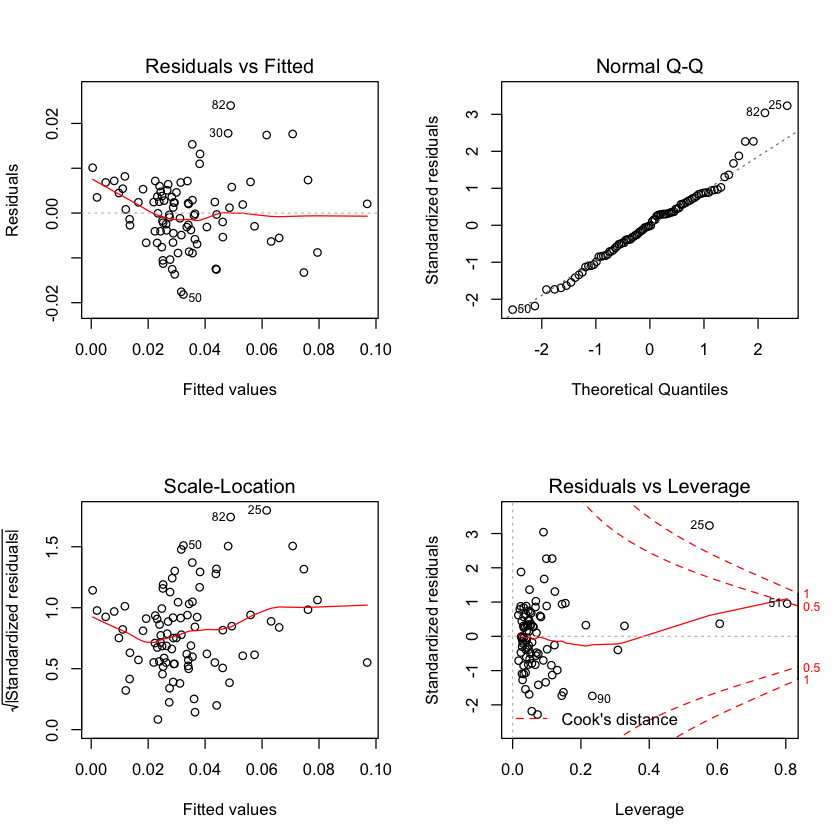

In [139]:
par(mfrow=c(2,2))
options(repr.plot.width=NULL, repr.plot.height=NULL)
plot(model3)

> By adding three social and economy related variables, the R2 increased to 0.82 and all terms are having small P values and the AIC value decreased to -598, which might indicate that our model is becoming more accurate. 

> Model 3 with log transformation

In [140]:
model3B <- lm(log(crmrte) ~ prbarr+prbconv+polpc+density+taxpc+pctmin80+pctymle,  data=crime_df)
paste("R squared value: ")
summary(model3B)$r.square
paste()
AIC(model3B)

[1] "R squared value: "

[1] 0.787251

character(0)

[1] 25.09342

In [141]:
stargazer(model3B, type = 'text',  title="Results", align=TRUE)


Results
                        Dependent variable:    
                    ---------------------------
                            log(crmrte)        
-----------------------------------------------
prbarr                       -2.120***         
                              (0.285)          
                                               
prbconv                      -0.716***         
                              (0.093)          
                                               
polpc                       171.142***         
                             (40.339)          
                                               
density                      0.116***          
                              (0.022)          
                                               
taxpc                          0.002           
                              (0.003)          
                                               
pctmin80                     0.012***          
                              (

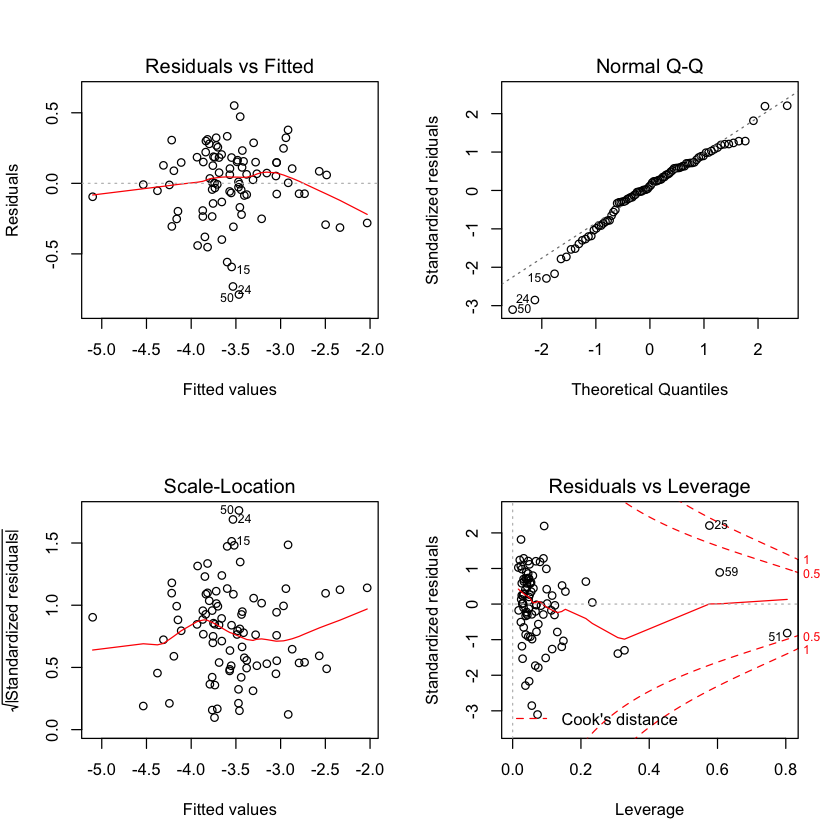

In [142]:
par(mfrow=c(2,2))
options(repr.plot.width=NULL, repr.plot.height=NULL)
plot(model3B)

> the log tranformed model is giving us a smaller r2 and bigger AIC value. Therefore, we will use the model without transformation. 

#### MLR assumption validation --

> Assumption 3: No Perfect Multicollinearity - We examed all variables and their correlation coefficients. We didn't find any perfect multicollinearity among them. Therefore, we believe this assumption is met. 

>Assumption 4: Zero Conditional Mean - ?

> Assumption 5: Homoskedasticity - We did a Breusch-Pagan test to verify the homoskedasticity with hypothesis of homoskdasticity exists. Our P-Value is smaller than 0.05 therefore, we are able to reject that hyphothesis. So in model 3, this assumption is met

In [110]:
lmtest::bptest(model3)


	studentized Breusch-Pagan test

data:  model3
BP = 17.537, df = 7, p-value = 0.01424


> Assumption 6: Normality of Errors - Our EDA showed that there are faily normal distribution of the errors with slight deviations. This assumption is met. 

>The study above shows that all variables are contributing to the model with p values < 0.01. In our model three, we will keep all the variables in model 2 and add the next group variables to make the model more robust. 

> The scatter plots for crime rate and the selected variable do not indicate any strong relationships. We can see evidence of non-linearity.